In [1]:
import pylab as plt
import tqdm as tqdm
import pandas as pd
from herbie import FastHerbie
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import warnings
import pyproj
import matplotlib.patches as patches
warnings.filterwarnings('ignore')
import colorcet as cc
import pickle
import datetime

In [21]:
def plot_map(ds, name, time_name, DATES):
    for D in DATES:
        print(D.strftime('%Y-%m-%d-%H-%M'))
        print(ds[time_name].values[ds[time_name].values==D][0])
        nt = np.where(ds[time_name].values==D)[0][0]
        # print(nt)
        p = ds.P[nt,:,:,:]
        ps = ds.PSFC[nt,:,:]
        dp = np.zeros_like(p) 
        nz, ny, nx = p.shape
        dpi = p.values[:-1,:,:] - p.values[1:,:,:]
        dp[0,:,:] = ps.values - p.values[0,:,:]
        for i in range(nz-1):
            dp[i+1,:,:] = dpi[i,:,:] - dp[i,:,:]
        qc = ds.QC[nt,:,:,:] 
        qi = ds.QI[nt,:,:,:] 
        qv = ds.QV[nt,:,:,:] 
        # print(ps - 2.0*dp.sum(axis=0))
        twp = 2.0*(dp*(qc.values+qi.values+qv.values)).sum(axis=0)*1.0e3/9.81
        cwp = 2.0*(dp*qc.values).sum(axis=0)*1.0e3/9.81
        iwp = 2.0*(dp*qi.values).sum(axis=0)*1.0e3/9.81
        lat = ds.latitude
        lon = ds.longitude

        fig=plt.figure(figsize=(10,10))
        pc = ccrs.PlateCarree()
        ax = fig.add_axes((0.05, 0.05, 0.8, 0.8), projection=pc)
        ax.coastlines()
        gl=ax.gridlines(draw_labels=True) 
        # ax.set_extent((lon.min(), lon.max(), lat.min(), lat.max()))
        ax.set_extent((-129, -119, 31, 39))
        print(cwp.min(), cwp.max())
        ctf = ax.contourf(lon, lat, cwp, cmap=cc.cm.rainbow_r, levels=np.arange(0, 1001, 100), extend='max')
        cax = fig.add_axes((0.9, 0.15, 0.03, 0.6))
        ax.set_title(f"{name} {D.strftime('%Y-%m-%d-%H-%M')}")
        plt.colorbar(ctf, cax=cax)
        fig.savefig(f"cwp.{name}.{D.strftime('%Y-%m-%d-%H-%M')}.jpg")
        plt.show()

        # fig=plt.figure(figsize=(10,10))
        # pc = ccrs.PlateCarree()
        # ax = fig.add_axes((0.05, 0.05, 0.8, 0.8), projection=pc)
        # ax.coastlines()
        # gl=ax.gridlines(draw_labels=True) 
        # # ax.set_extent((lon.min(), lon.max(), lat.min(), lat.max()))
        # ax.set_extent((-129, -119, 31, 39))
        # print(twp.min(), twp.max())
        # ctf = ax.contourf(lon, lat, twp, cmap=cc.cm.rainbow_r, levels=np.arange(0, 24001, 2000), extend='max')
        # # ctf = ax.contourf(lon, lat, twp, cmap=cc.cm.blues_r, extend='max')
        # cax = fig.add_axes((0.9, 0.15, 0.03, 0.6))
        # ax.set_title(f"{name} {D.strftime('%Y-%m-%d-%H-%M')}")
        # plt.colorbar(ctf, cax=cax)
        # fig.savefig(f"twp.{name}.{D.strftime('%Y-%m-%d-%H-%M')}.jpg")        
        # plt.show()

In [9]:
DATES = pd.date_range('2021-03-09 12:00', '2021-03-11 00:00', freq='1H')
# DATES = pd.date_range('2021-03-09 12:00', '2021-03-09 12:00', freq='1H')

In [12]:
hrrr = xr.open_dataset("~/lidarbuoy/pinacles_in/pinacles_in_21-03-08-00z_to_21-03-17-00z.nc")

2021-03-09-12-00
2021-03-09T12:00:00.000000000
0.0 5009.7173


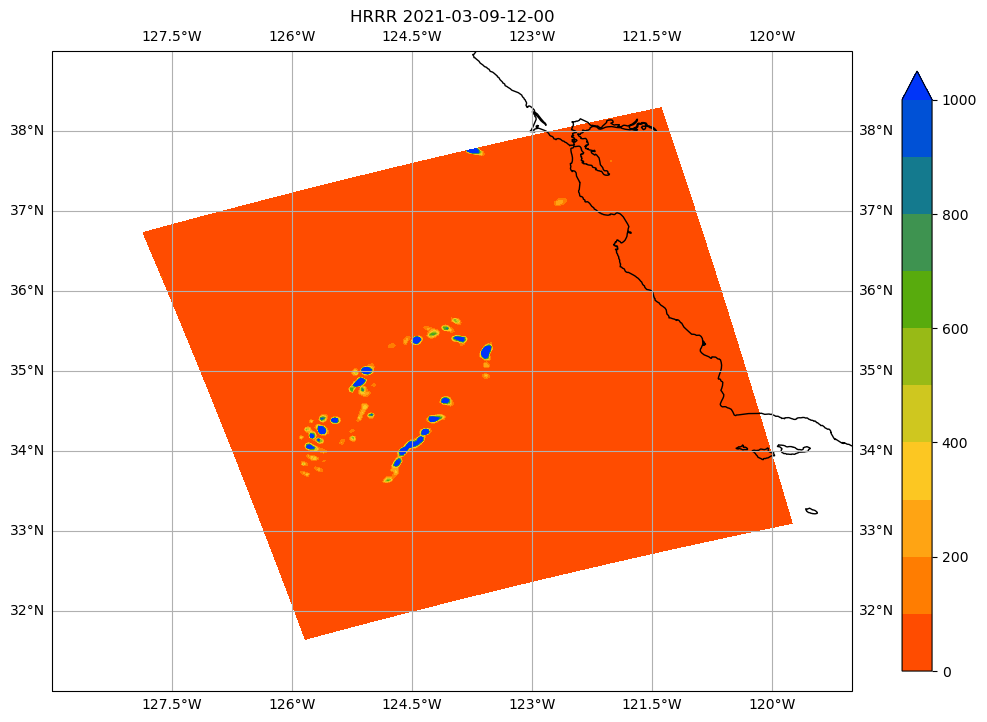

2021-03-09-13-00
2021-03-09T13:00:00.000000000
0.0 3641.2334


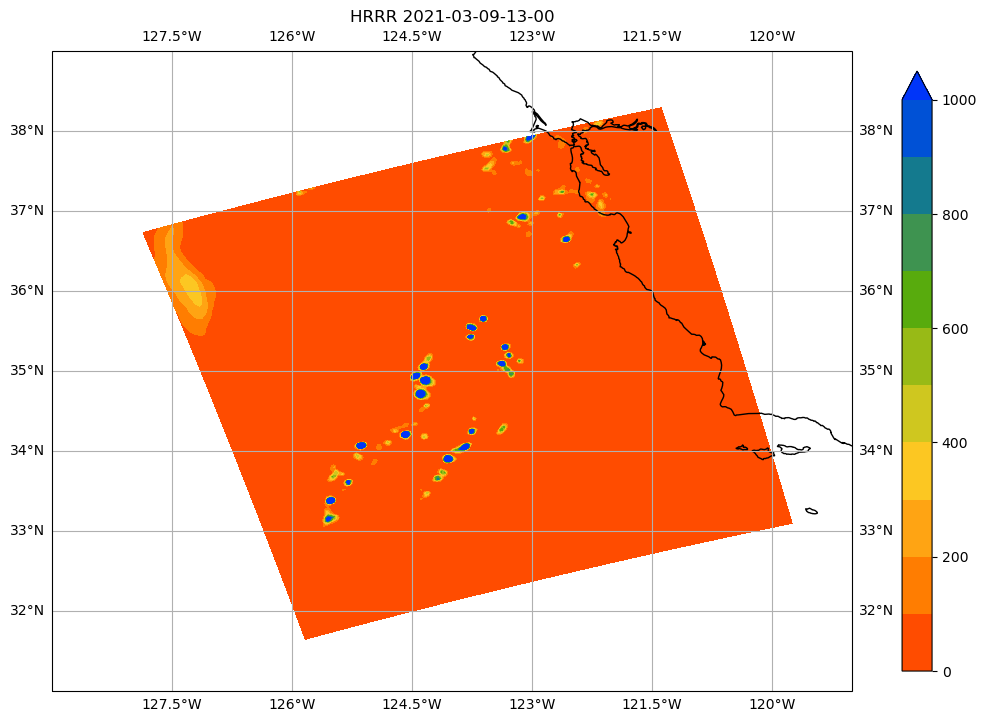

2021-03-09-14-00
2021-03-09T14:00:00.000000000
0.0 5334.64


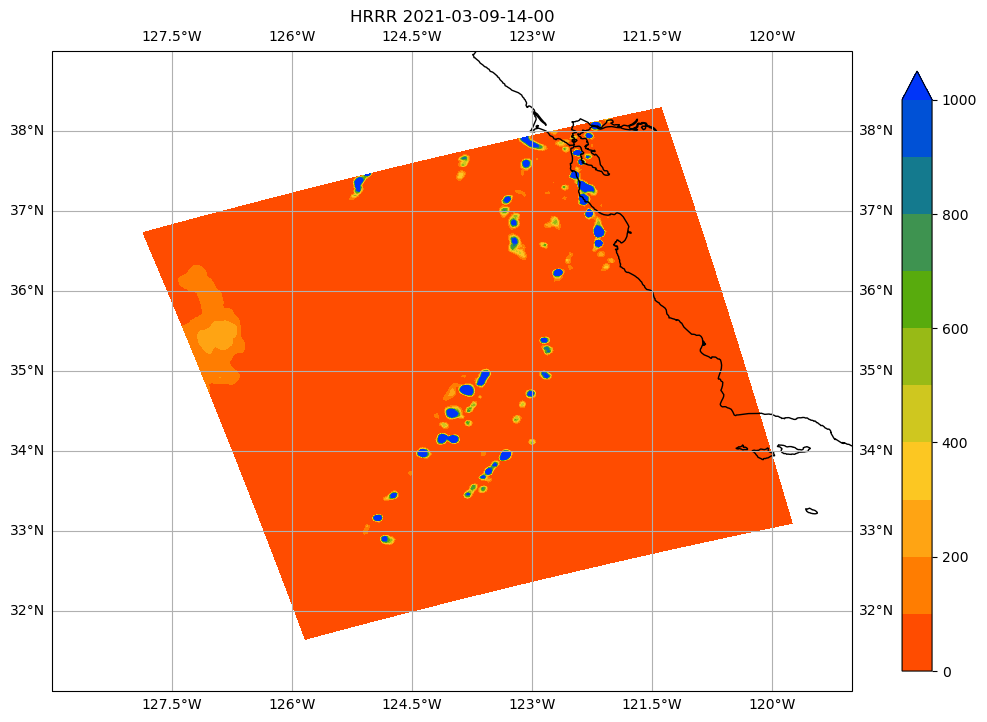

2021-03-09-15-00
2021-03-09T15:00:00.000000000
0.0 2825.4702


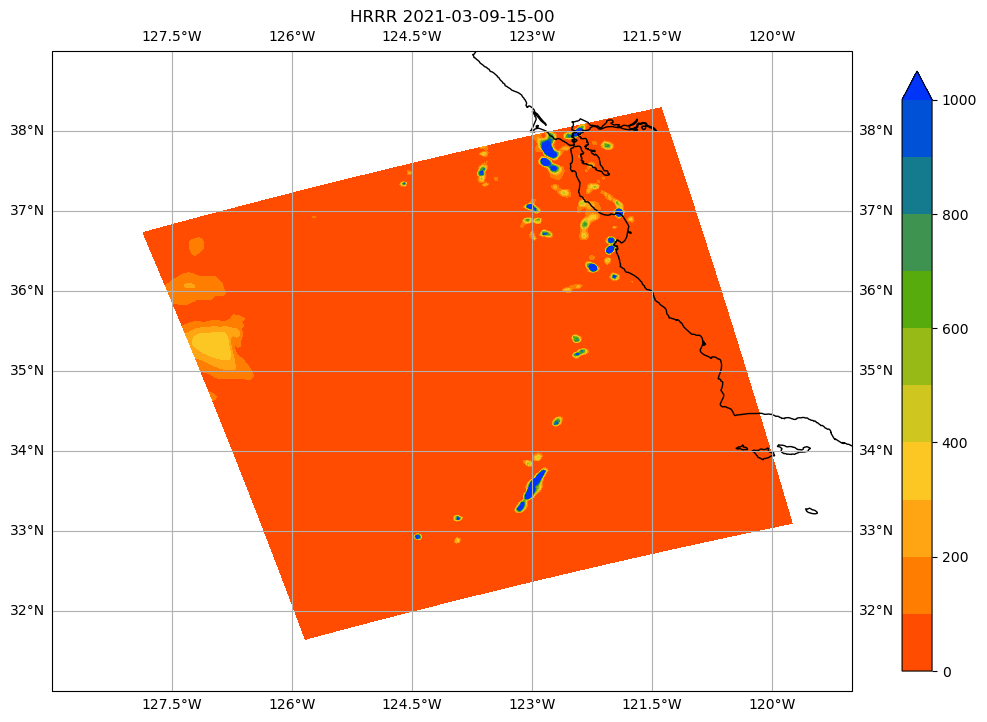

2021-03-09-16-00
2021-03-09T16:00:00.000000000
0.0 3303.7761


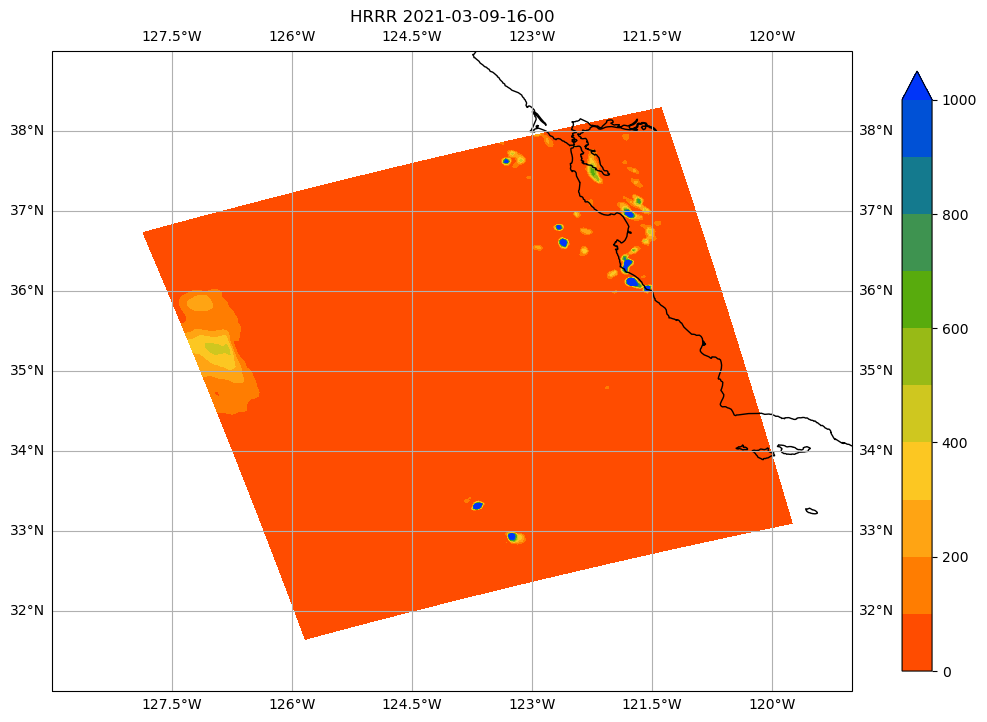

2021-03-09-17-00
2021-03-09T17:00:00.000000000
0.0 2848.3699


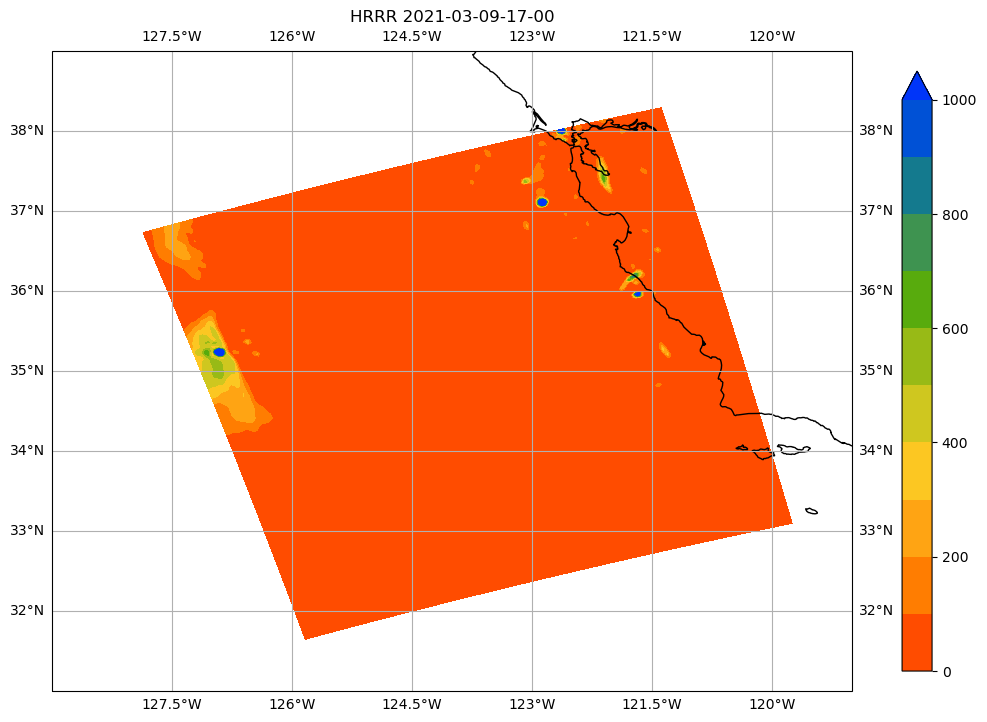

2021-03-09-18-00
2021-03-09T18:00:00.000000000
0.0 5516.9536


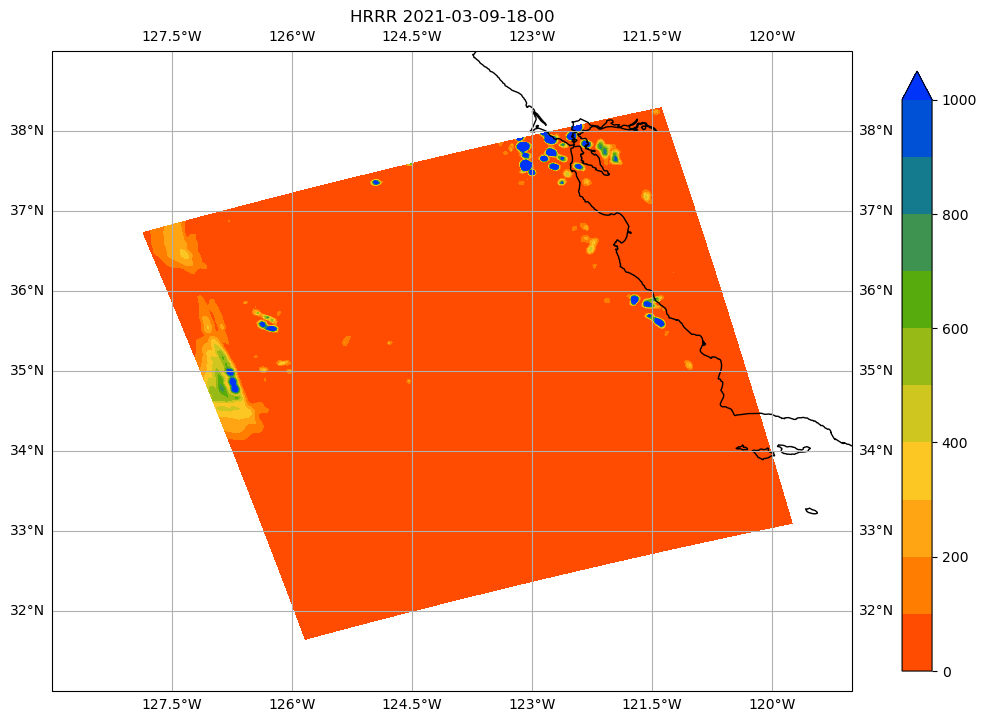

2021-03-09-19-00
2021-03-09T19:00:00.000000000
0.0 5177.1587


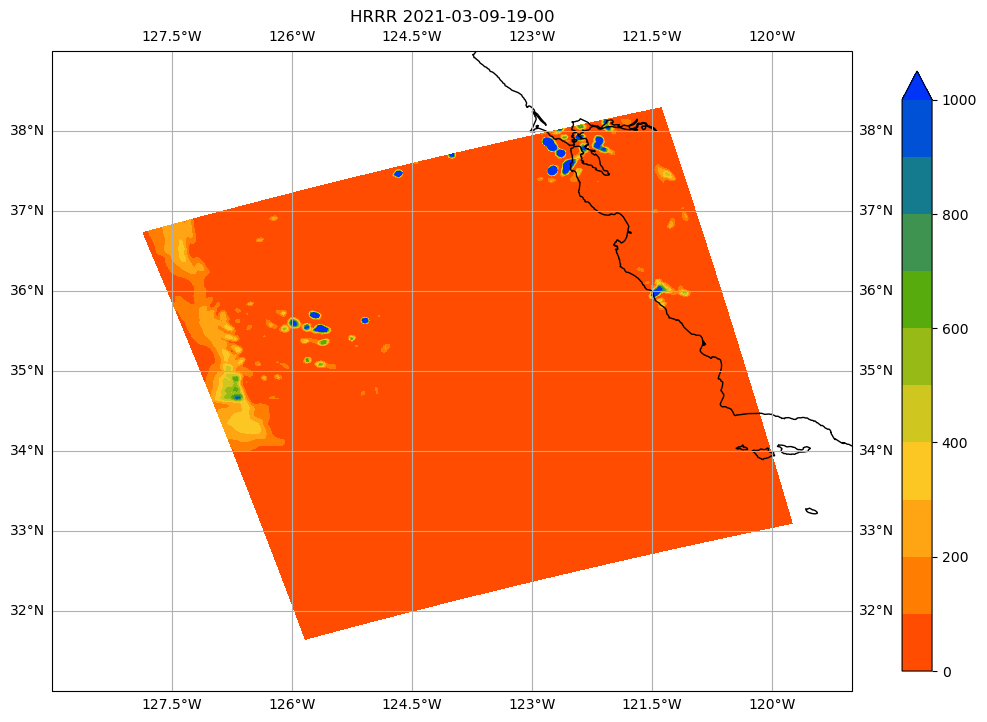

2021-03-09-20-00
2021-03-09T20:00:00.000000000
0.0 5454.2354


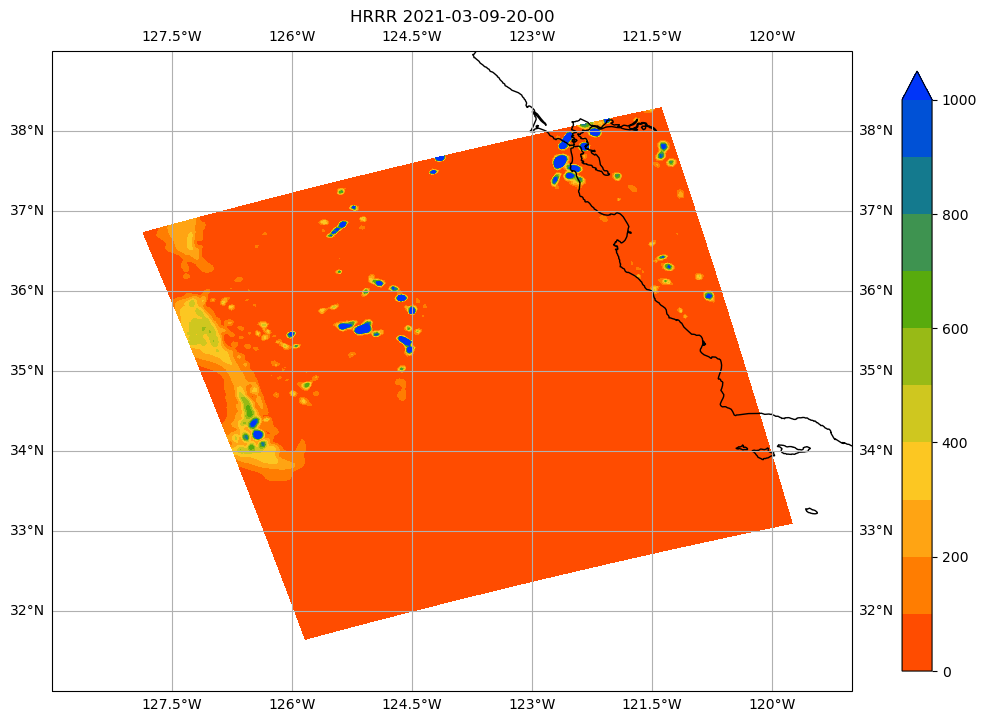

2021-03-09-21-00
2021-03-09T21:00:00.000000000
0.0 5639.159


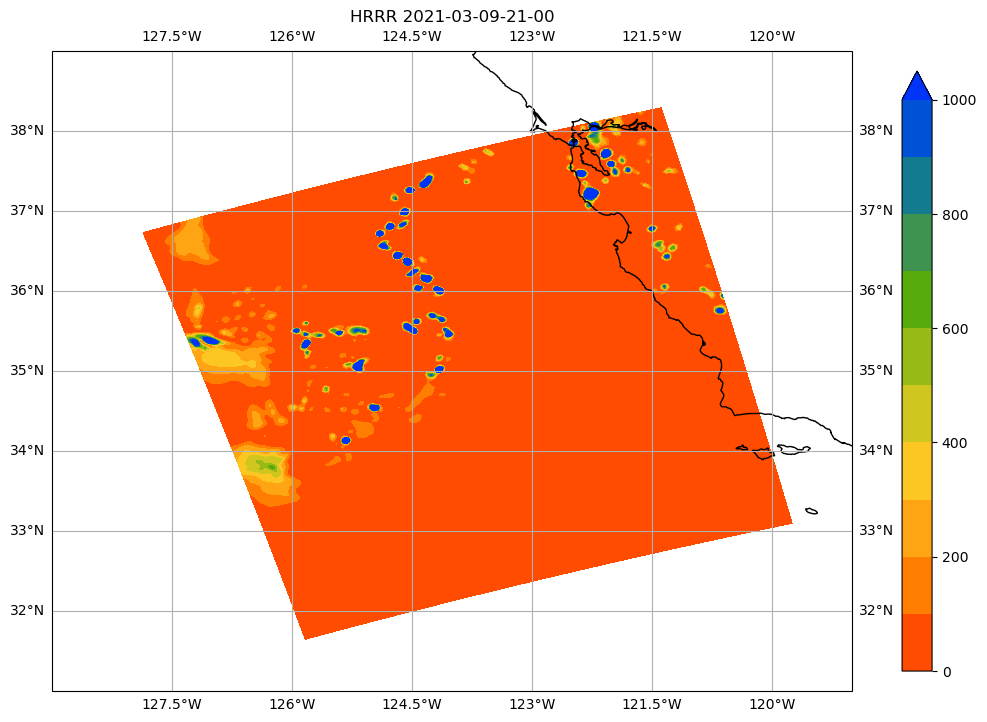

2021-03-09-22-00
2021-03-09T22:00:00.000000000
0.0 4878.0444


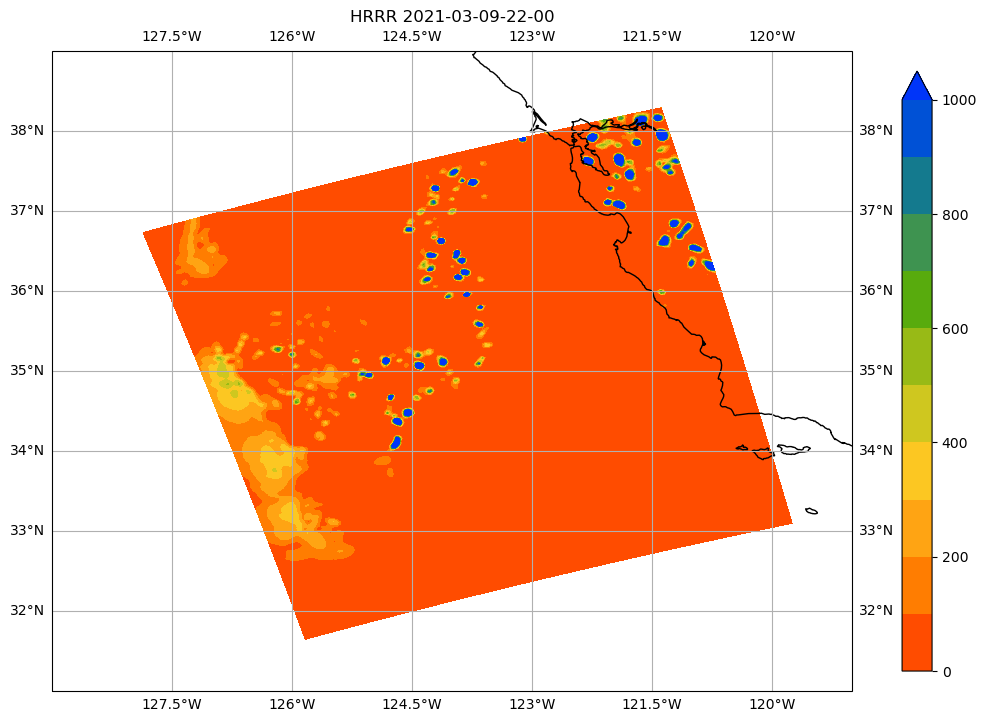

2021-03-09-23-00
2021-03-09T23:00:00.000000000
0.0 5598.9683


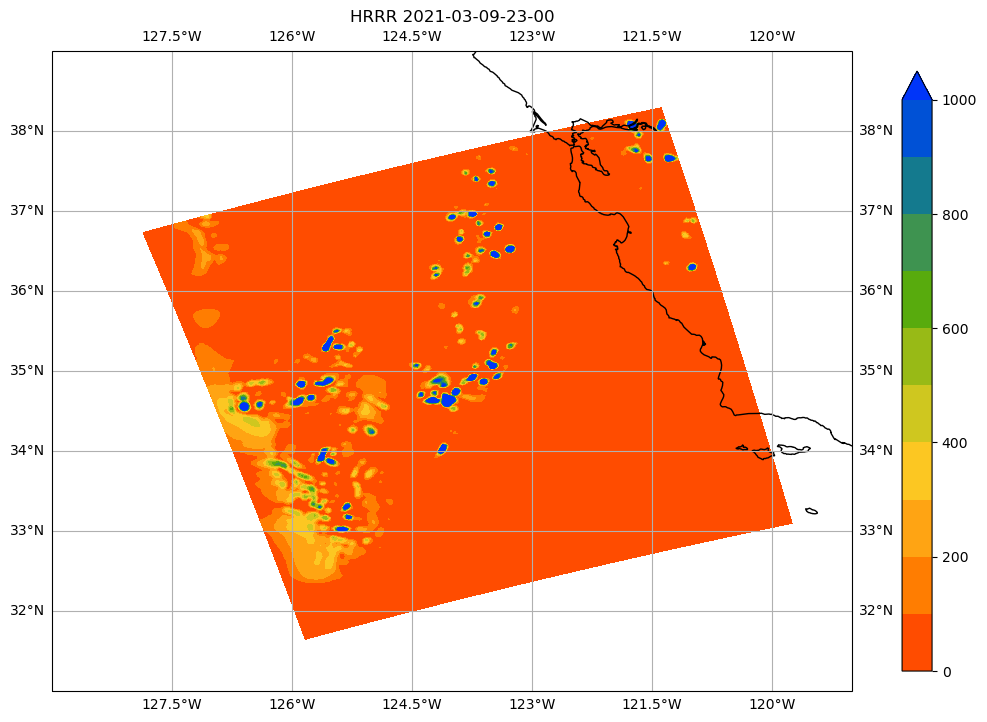

2021-03-10-00-00
2021-03-10T00:00:00.000000000
0.0 5357.171


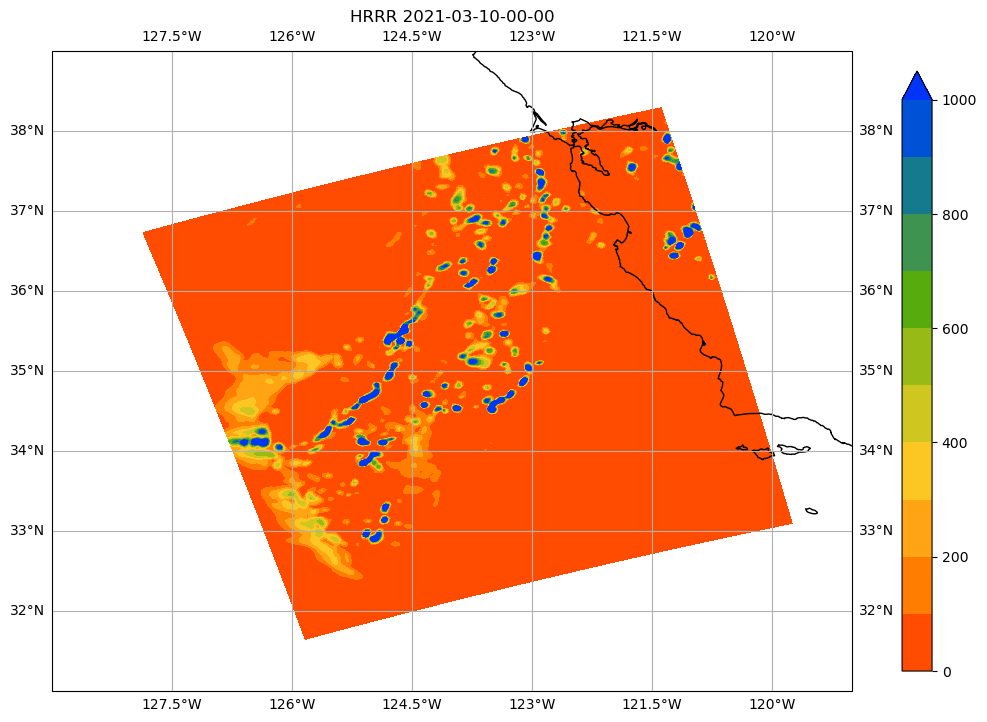

2021-03-10-01-00
2021-03-10T01:00:00.000000000
0.0 4612.5654


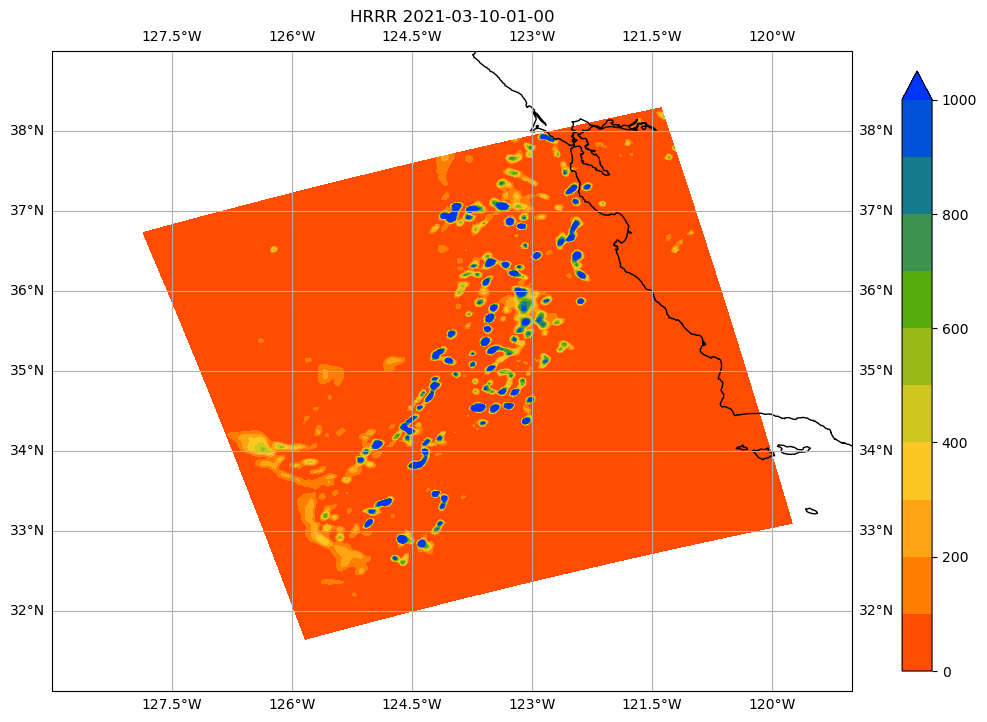

2021-03-10-02-00
2021-03-10T02:00:00.000000000
0.0 4716.129


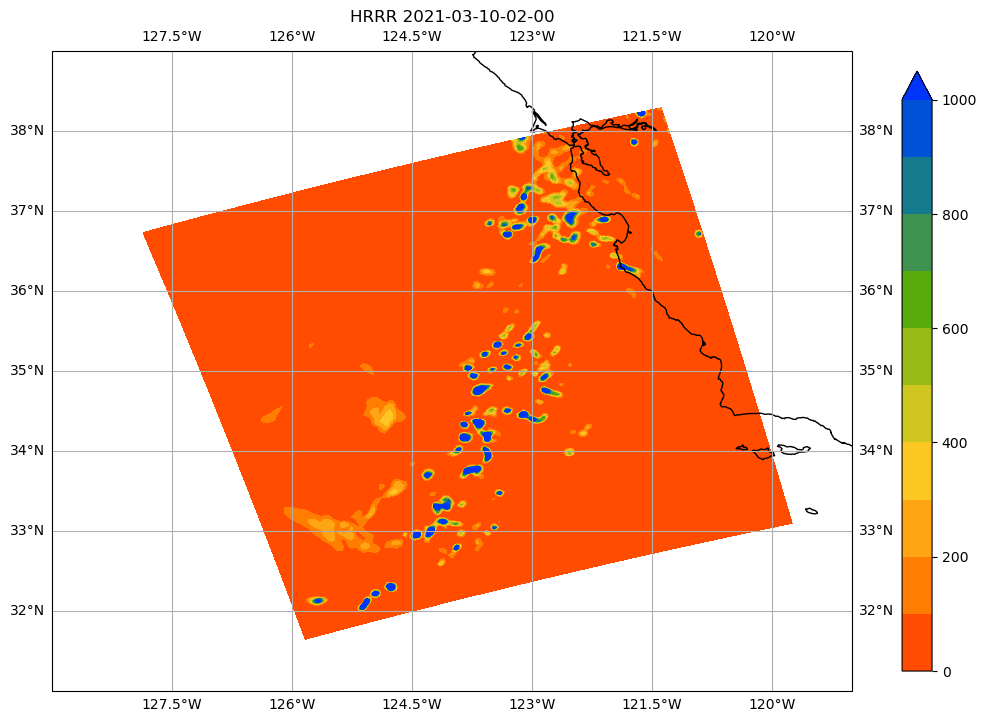

2021-03-10-03-00
2021-03-10T03:00:00.000000000
0.0 3829.2935


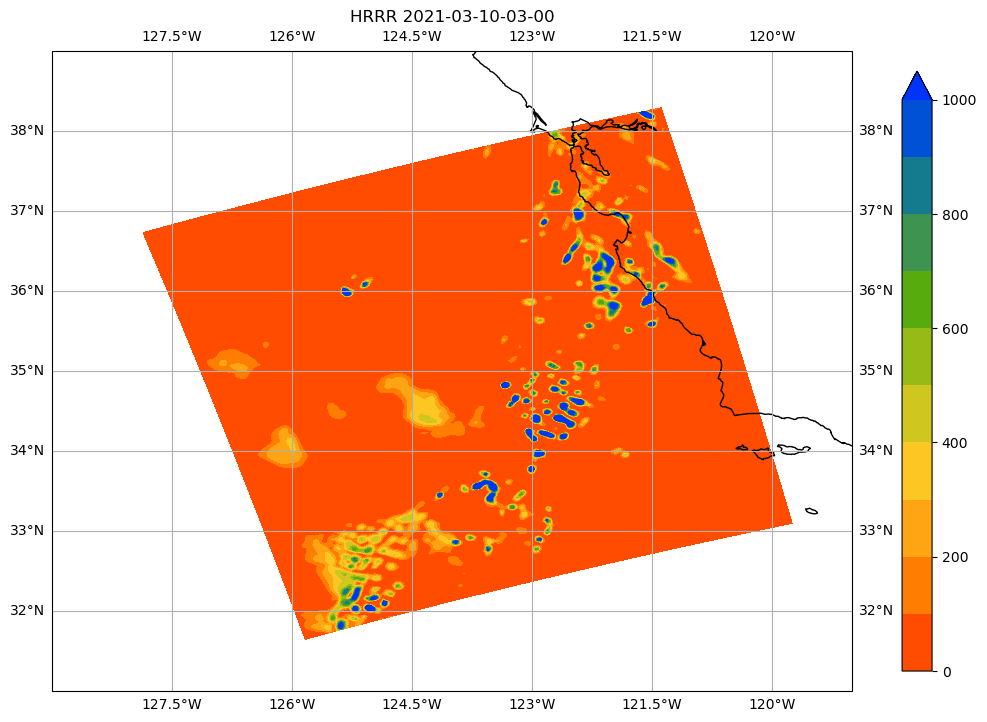

2021-03-10-04-00
2021-03-10T04:00:00.000000000
0.0 6064.9375


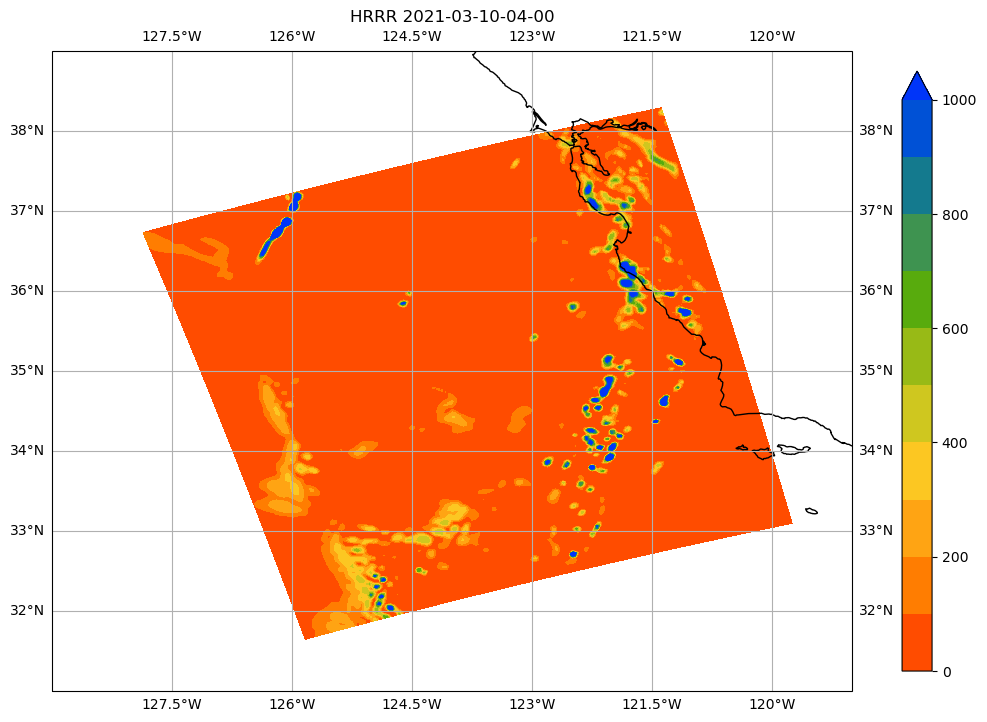

2021-03-10-05-00
2021-03-10T05:00:00.000000000
0.0 6253.155


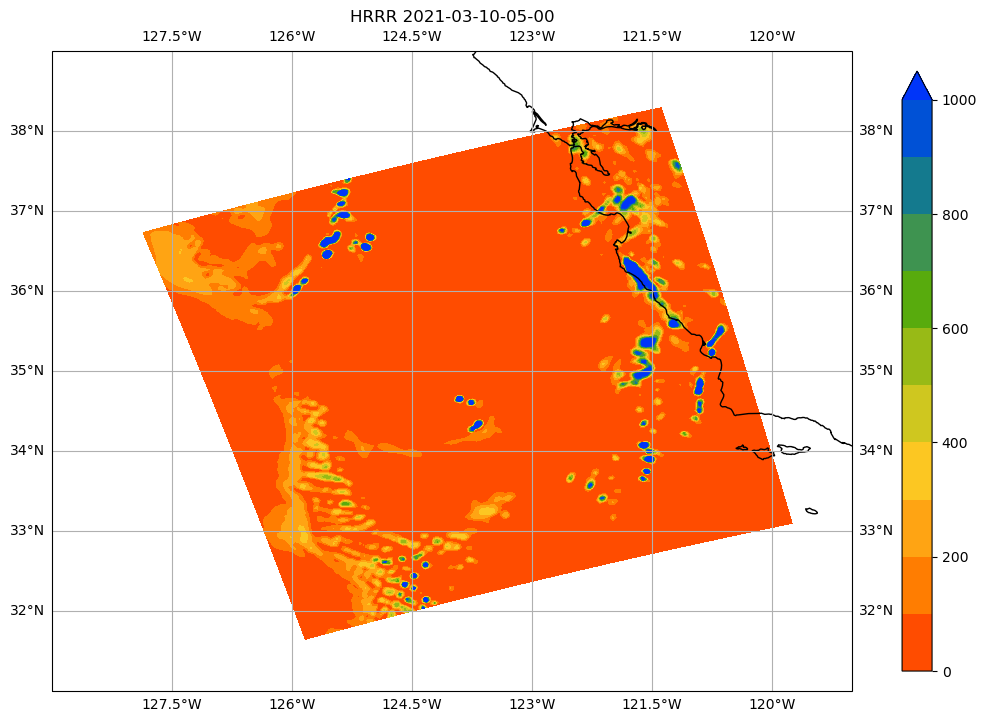

2021-03-10-06-00
2021-03-10T06:00:00.000000000
0.0 7413.625


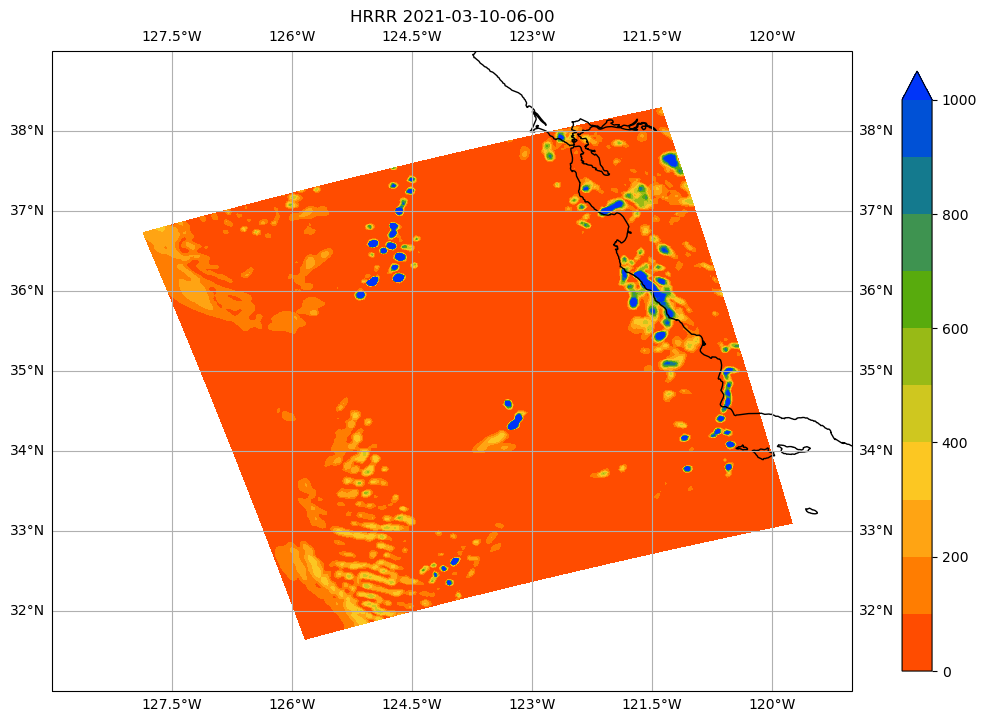

2021-03-10-07-00
2021-03-10T07:00:00.000000000
0.0 8943.416


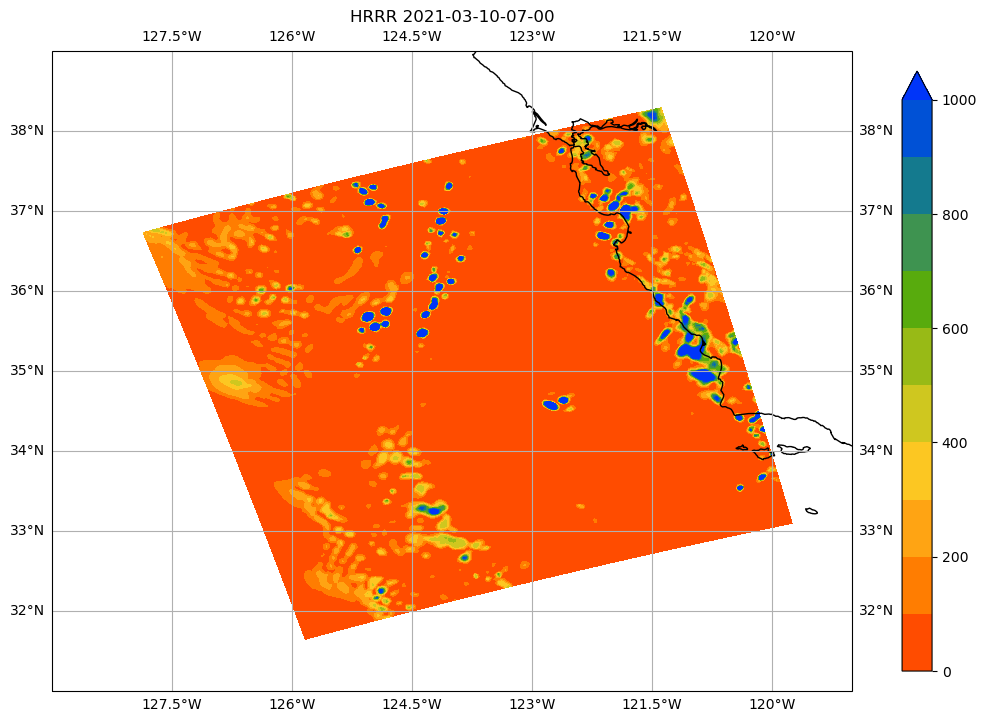

2021-03-10-08-00
2021-03-10T08:00:00.000000000
0.0 8473.368


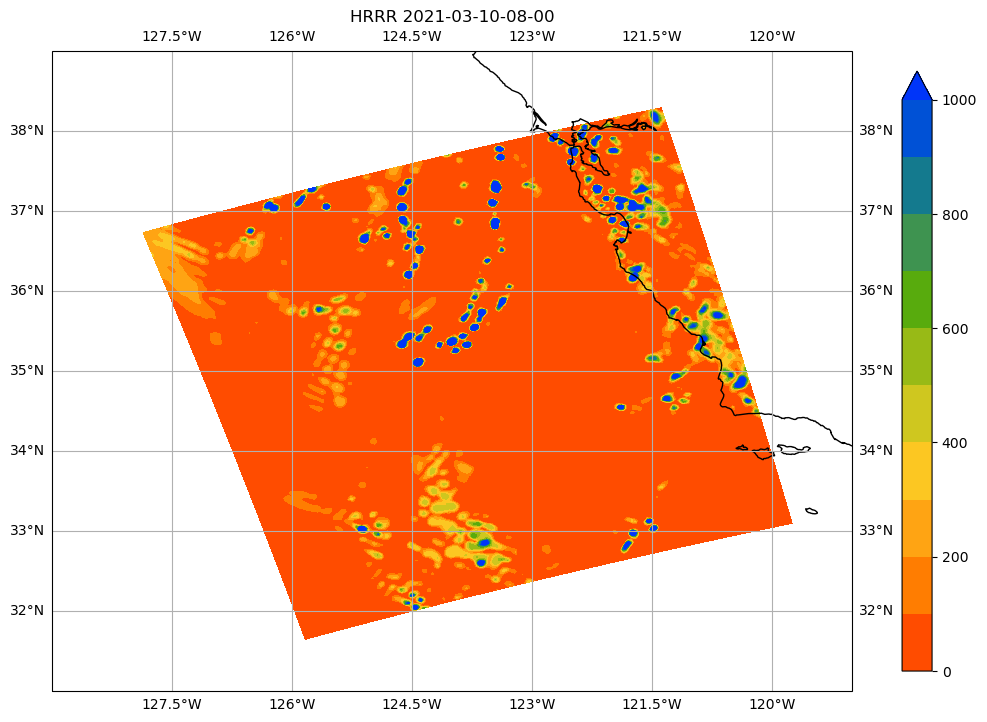

2021-03-10-09-00
2021-03-10T09:00:00.000000000
0.0 6460.4297


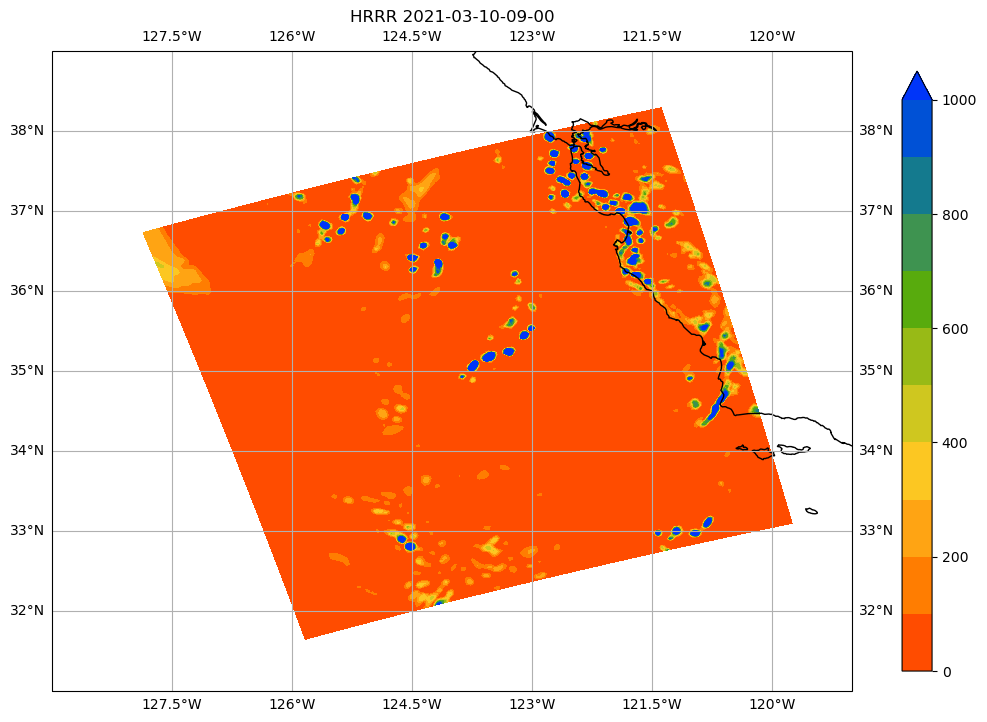

2021-03-10-10-00
2021-03-10T10:00:00.000000000
0.0 6993.925


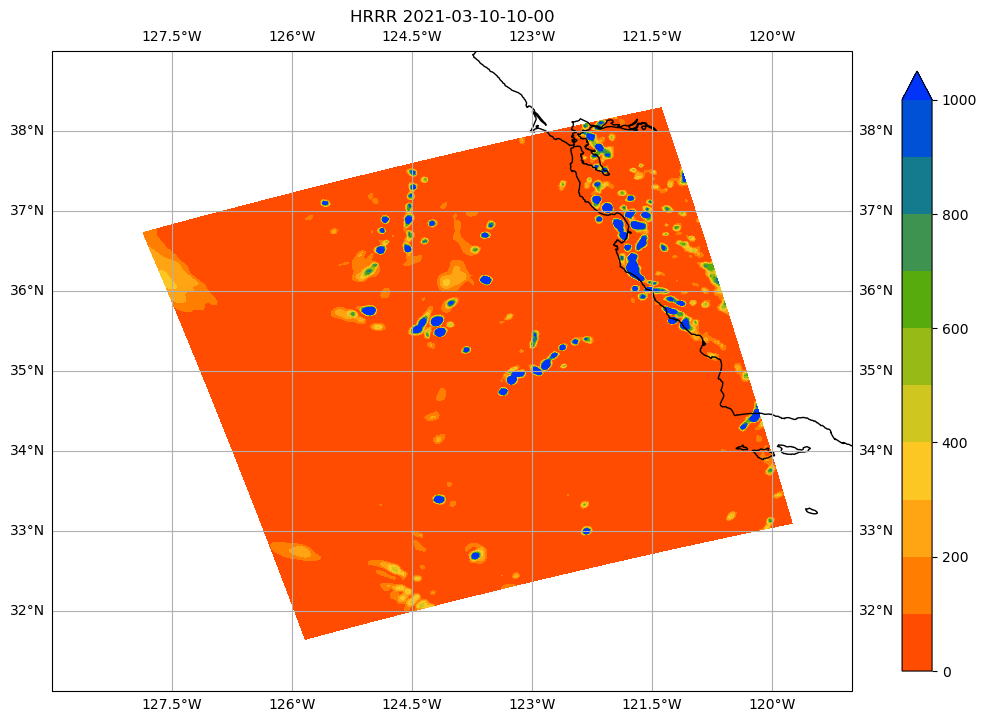

2021-03-10-11-00
2021-03-10T11:00:00.000000000
0.0 7962.7427


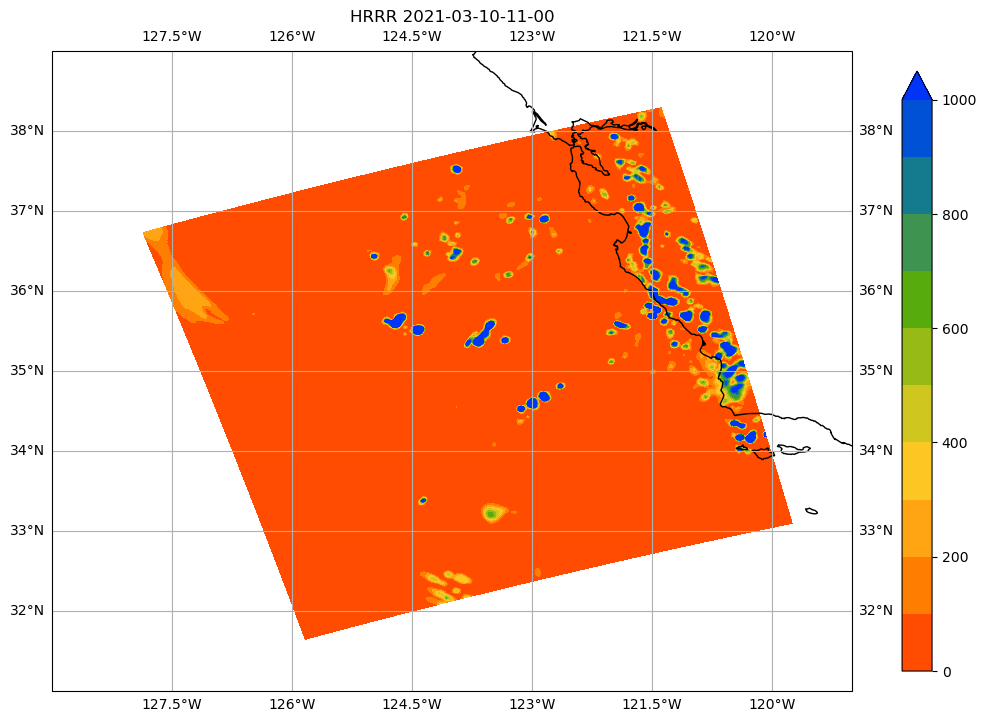

2021-03-10-12-00
2021-03-10T12:00:00.000000000
0.0 6420.082


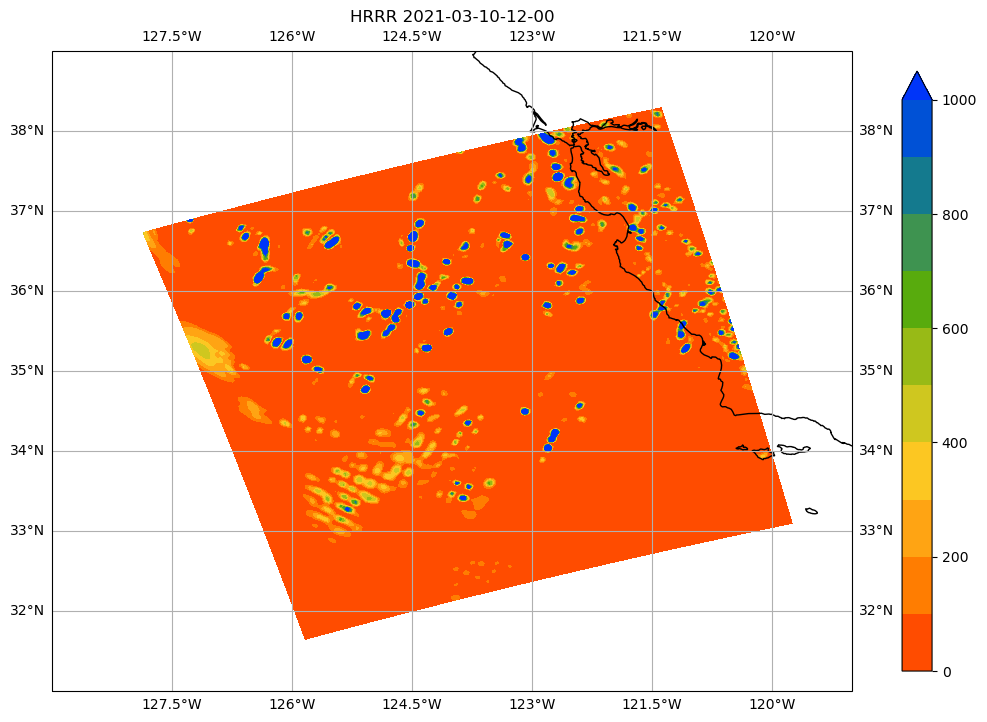

2021-03-10-13-00
2021-03-10T13:00:00.000000000
0.0 7353.1494


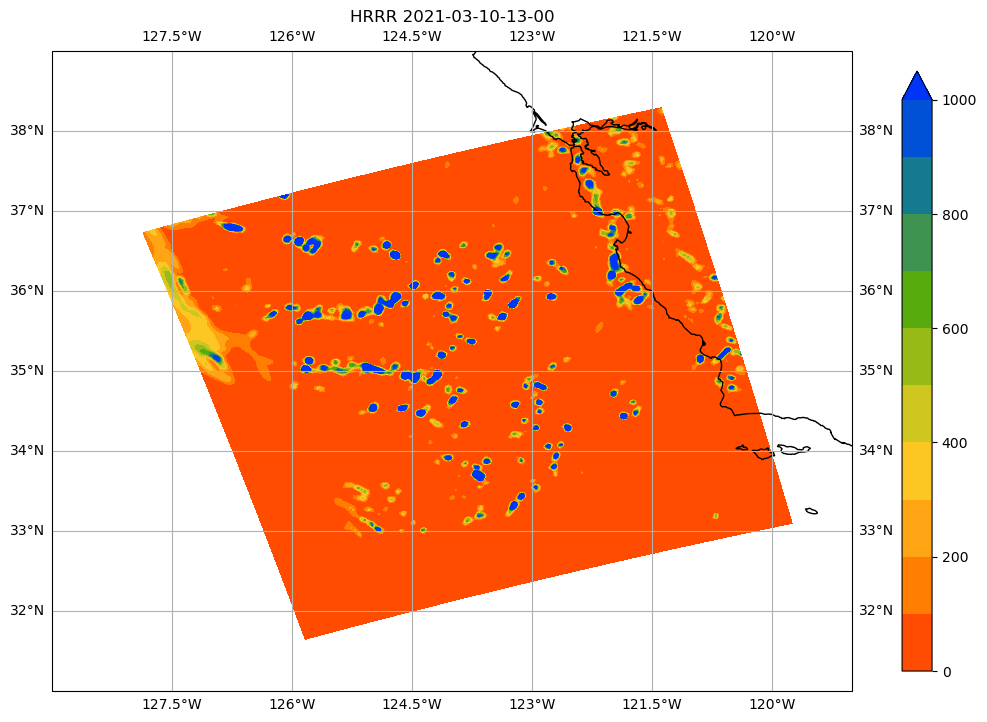

2021-03-10-14-00
2021-03-10T14:00:00.000000000
0.0 8616.338


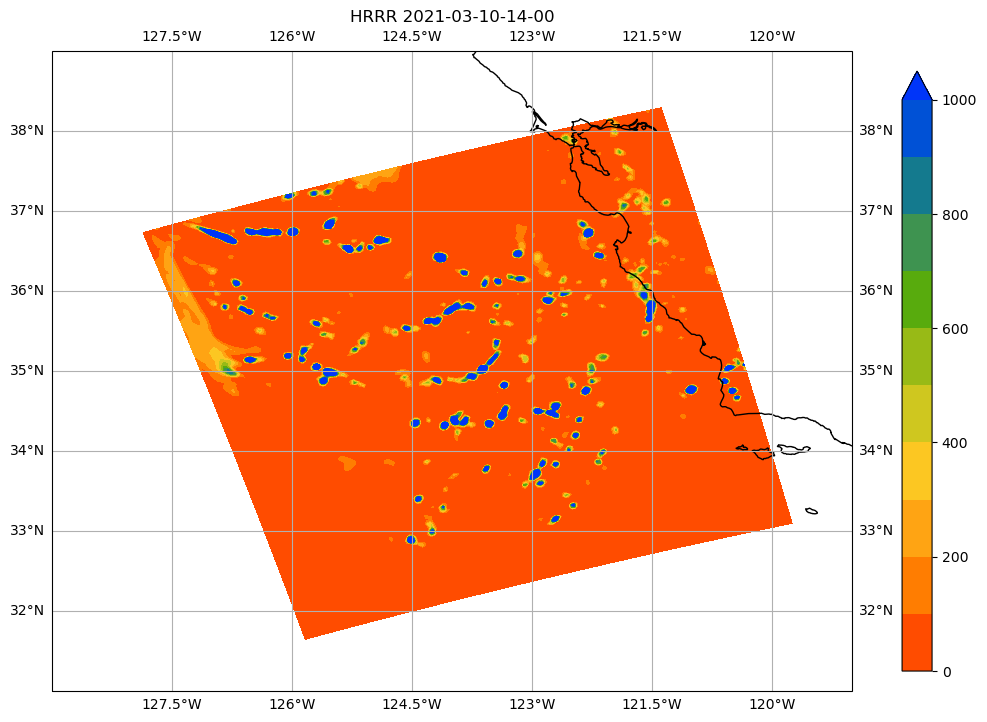

2021-03-10-15-00
2021-03-10T15:00:00.000000000
0.0 8443.896


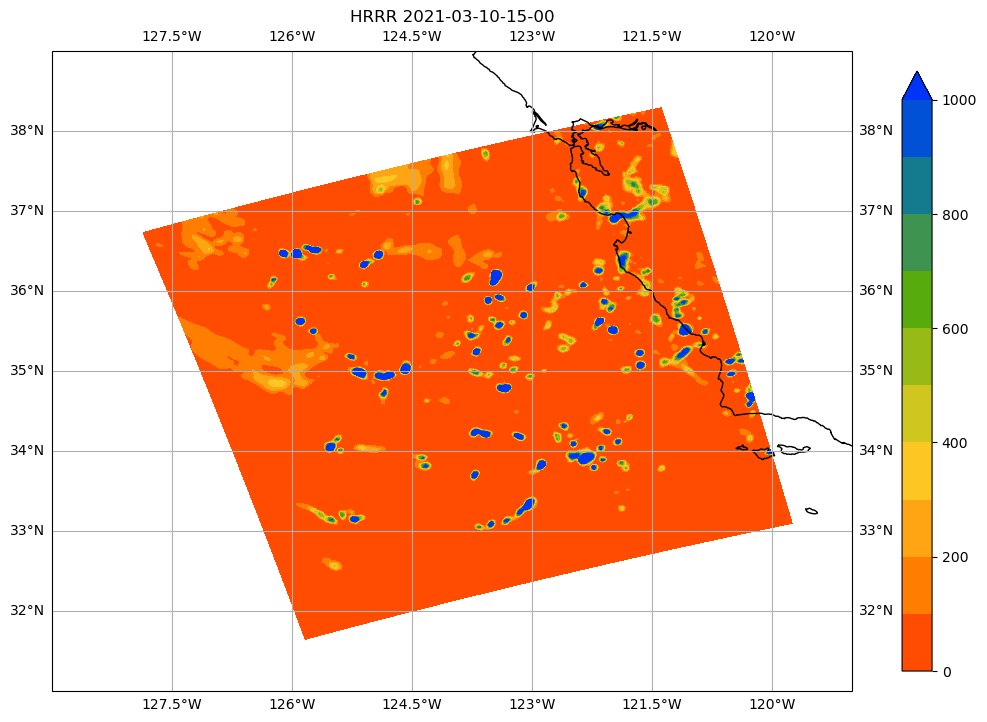

2021-03-10-16-00
2021-03-10T16:00:00.000000000
0.0 5473.4717


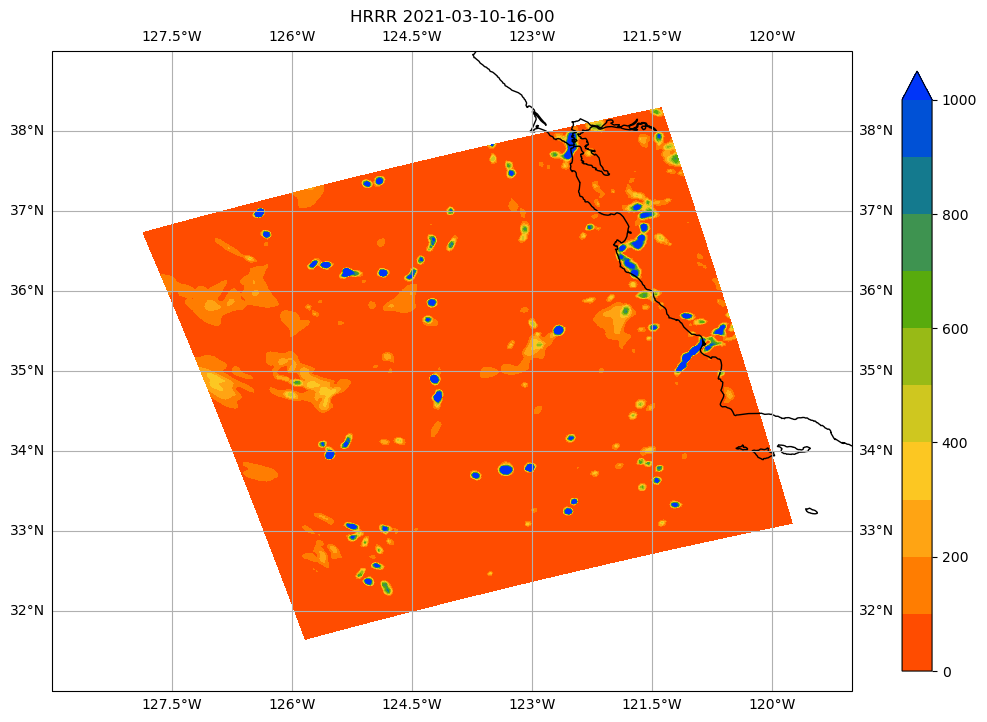

2021-03-10-17-00
2021-03-10T17:00:00.000000000
0.0 3475.031


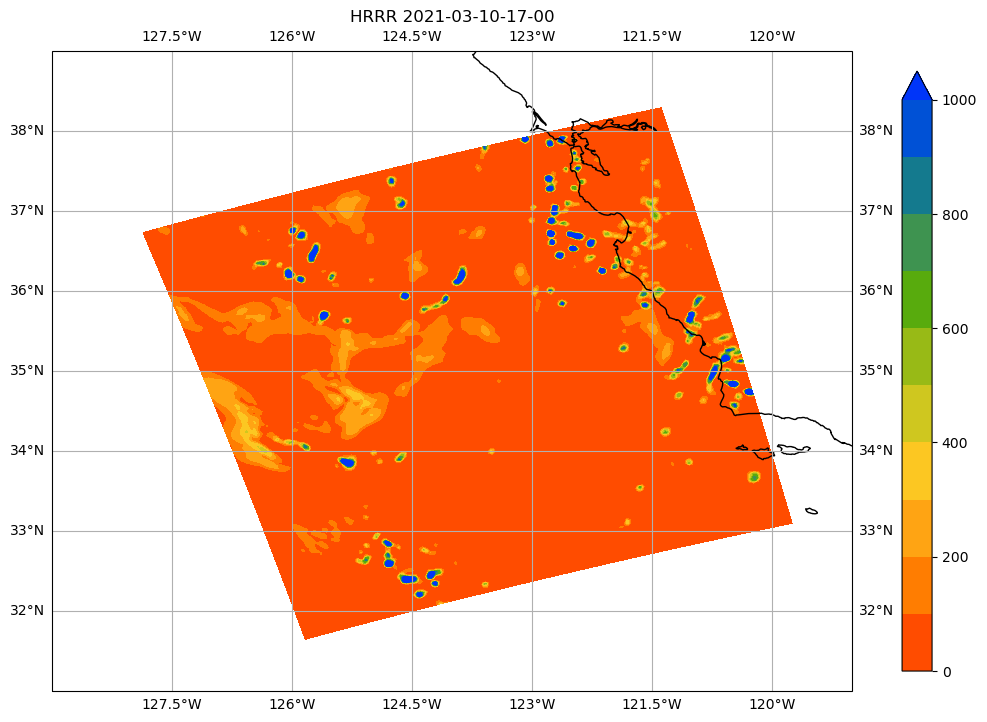

2021-03-10-18-00
2021-03-10T18:00:00.000000000
0.0 4403.122


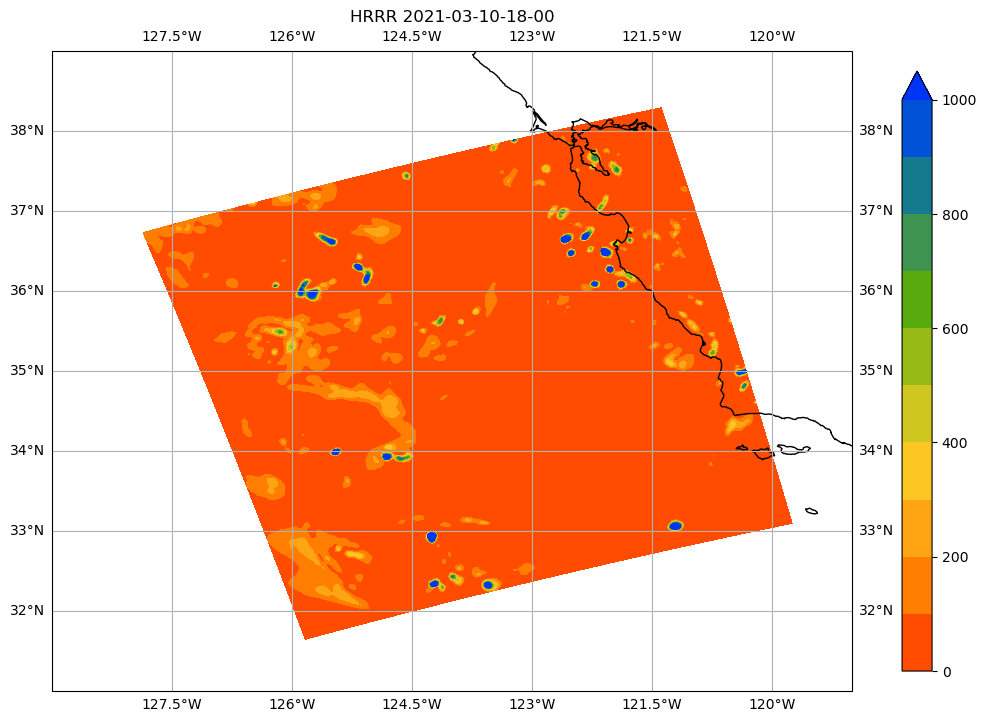

2021-03-10-19-00
2021-03-10T19:00:00.000000000
0.0 4601.049


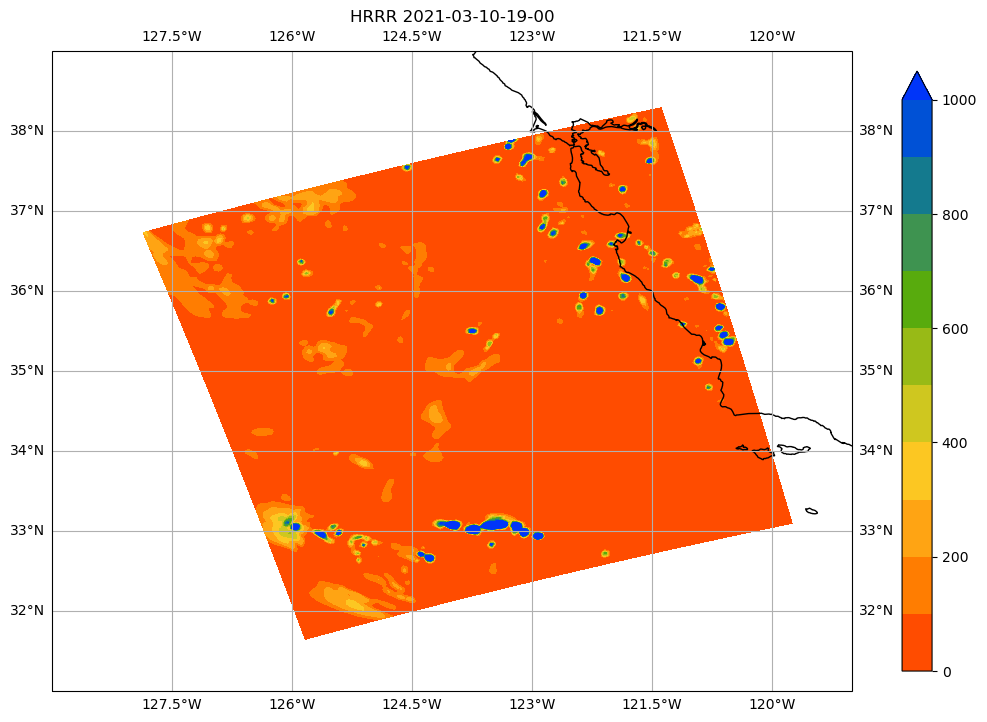

2021-03-10-20-00
2021-03-10T20:00:00.000000000
0.0 5764.656


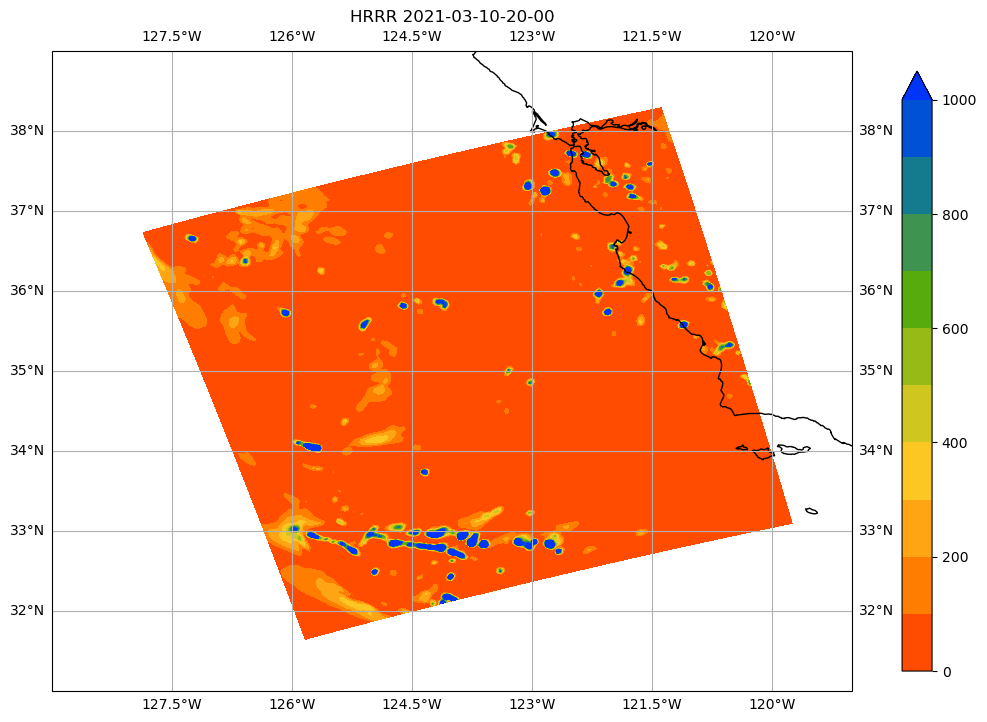

2021-03-10-21-00
2021-03-10T21:00:00.000000000
0.0 6476.6875


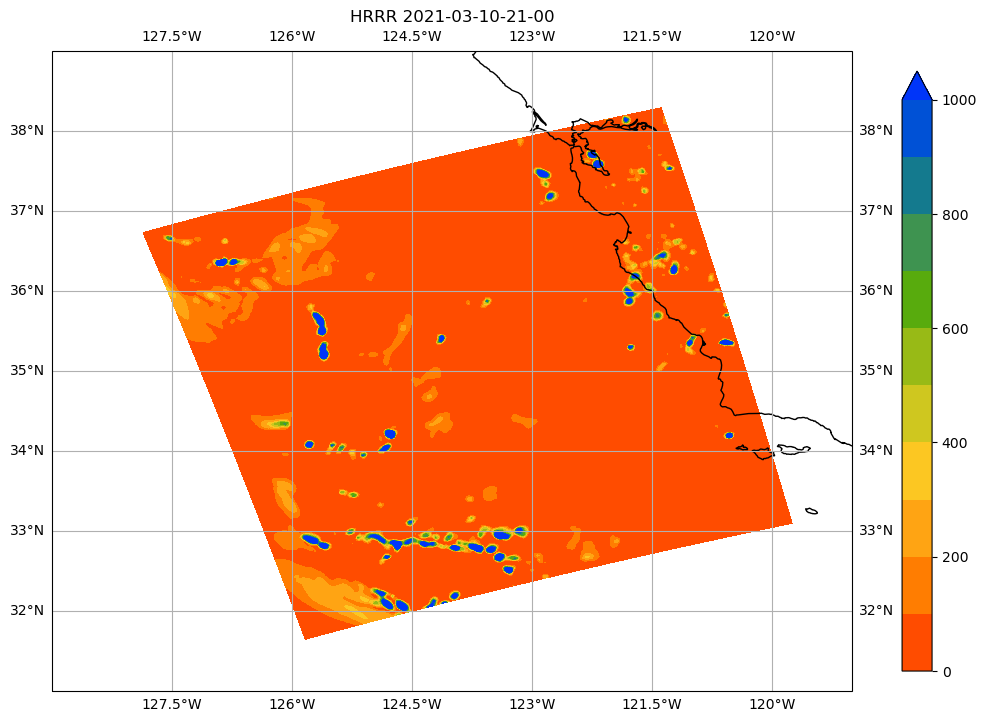

2021-03-10-22-00
2021-03-10T22:00:00.000000000
0.0 3962.081


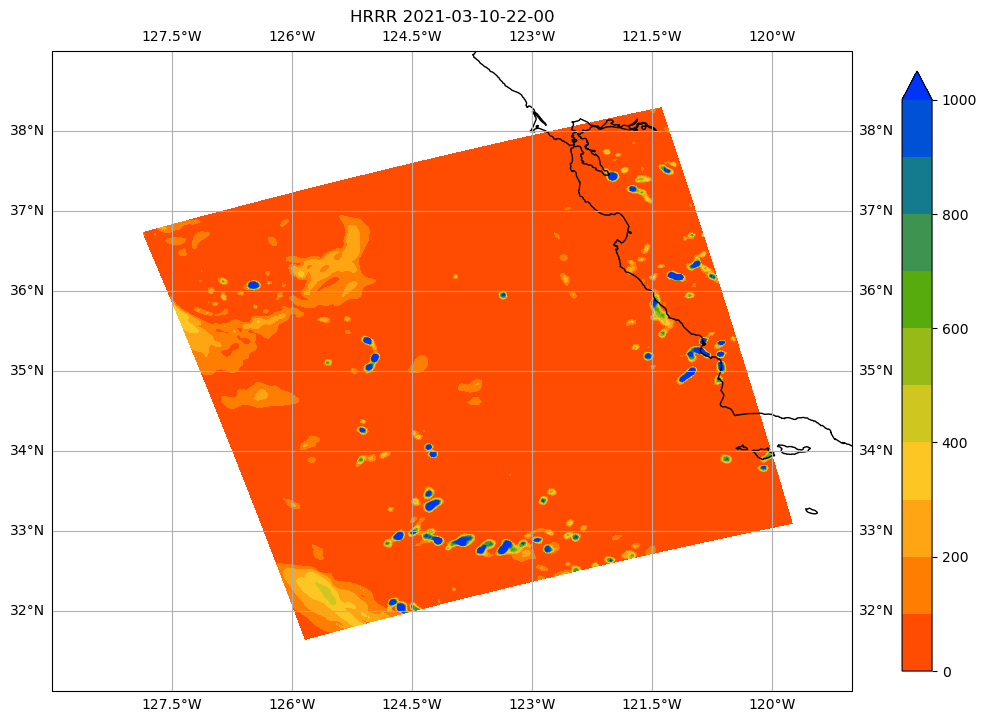

2021-03-10-23-00
2021-03-10T23:00:00.000000000
0.0 4167.0107


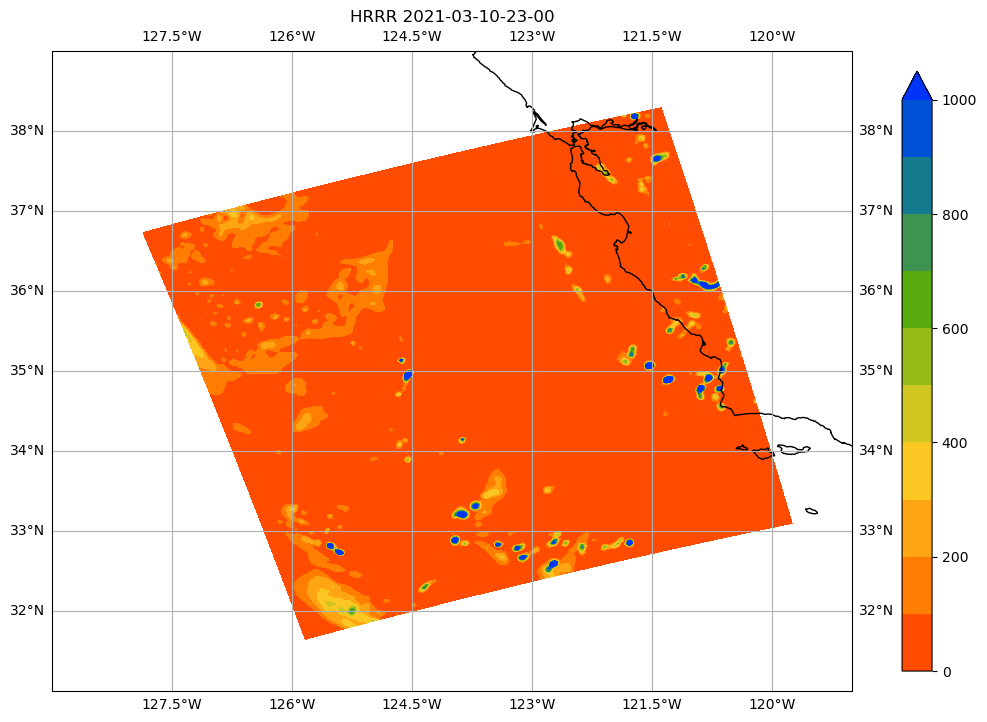

2021-03-11-00-00
2021-03-11T00:00:00.000000000
0.0 6025.277


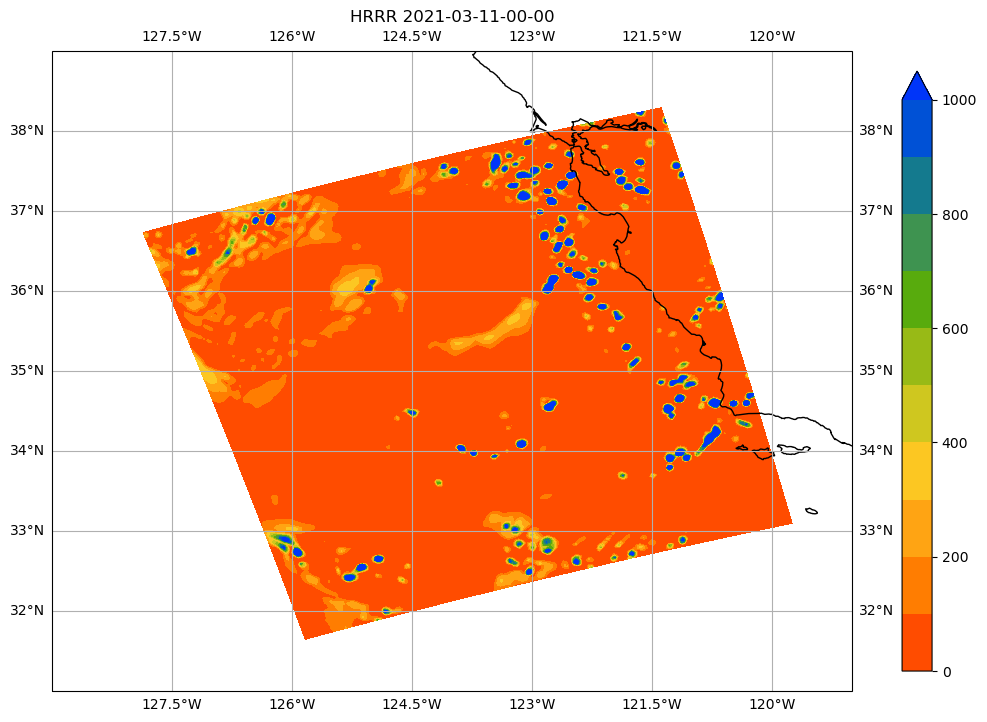

In [22]:
plot_map(hrrr, 'HRRR', 'valid_time', DATES)

In [5]:
wrf = xr.open_dataset("pinacles_in.wrf/pinacles_in_2021-03-09_12_to_2021-03-11_00.nc")

2021-03-09-12-00
2021-03-09T12:00:00.000000000
0.0 0.0


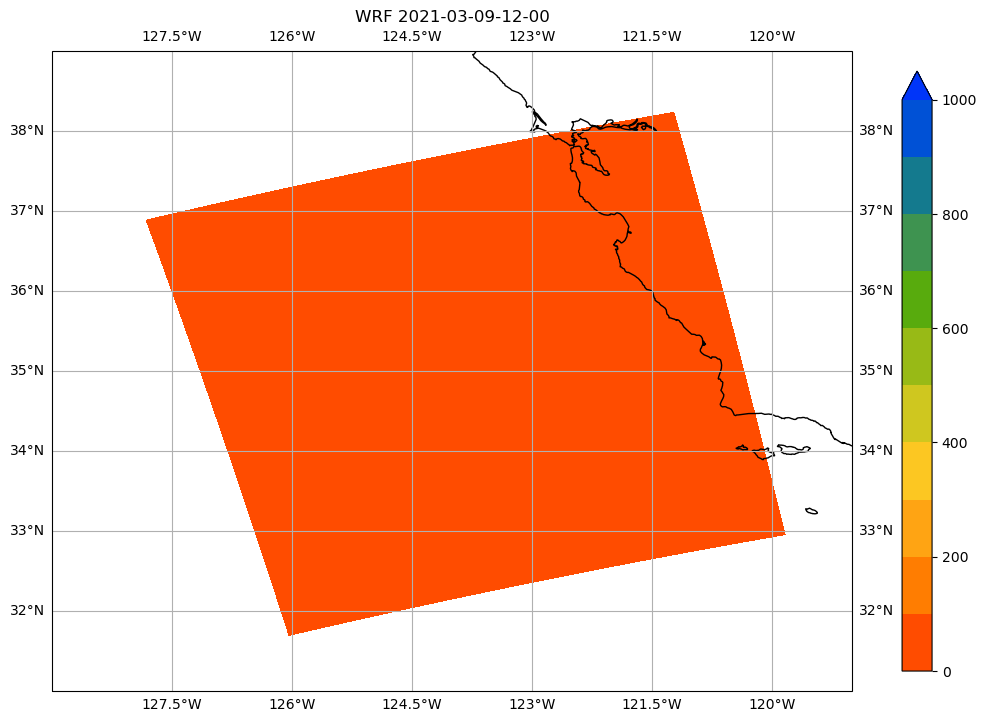

2021-03-09-13-00
2021-03-09T13:00:00.000000000
0.0 16.504148


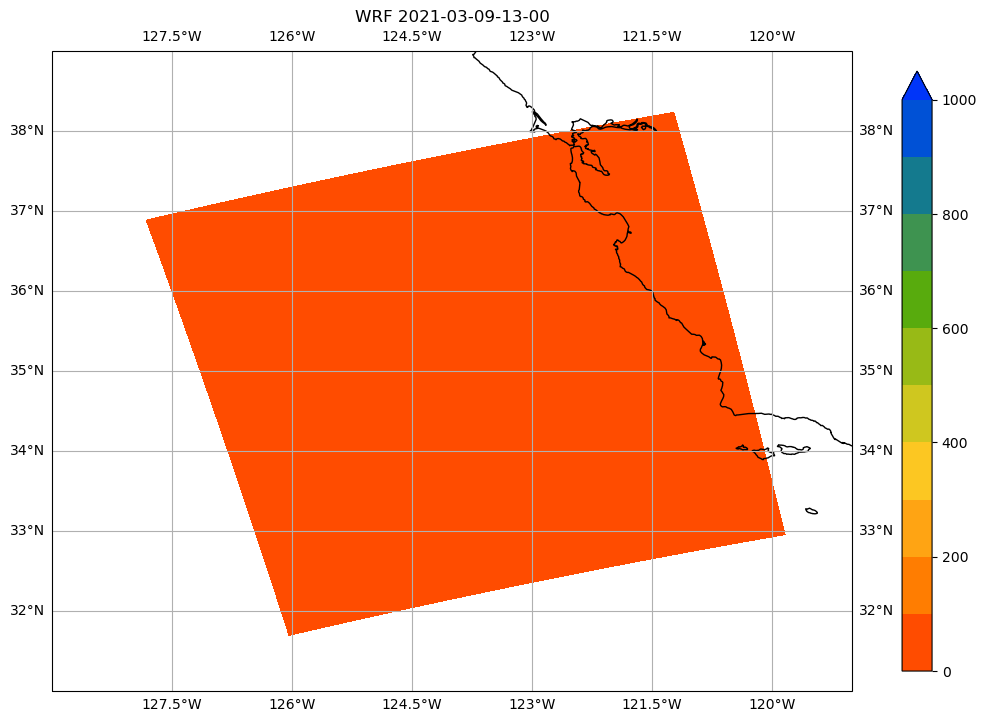

2021-03-09-14-00
2021-03-09T14:00:00.000000000
0.0 136.72725


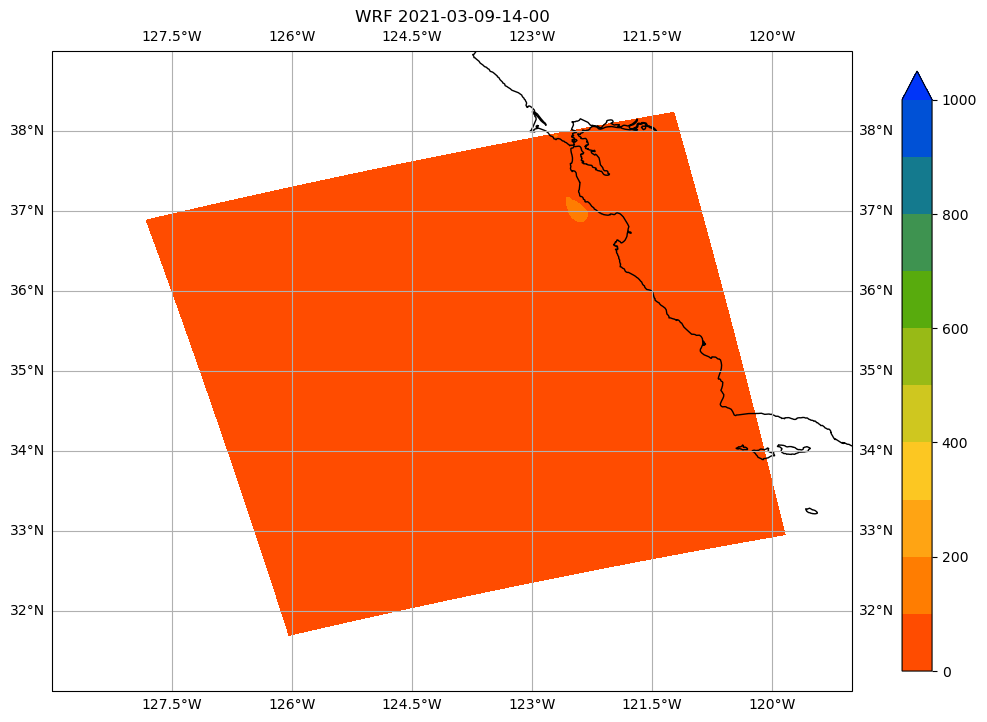

2021-03-09-15-00
2021-03-09T15:00:00.000000000
0.0 1662.9729


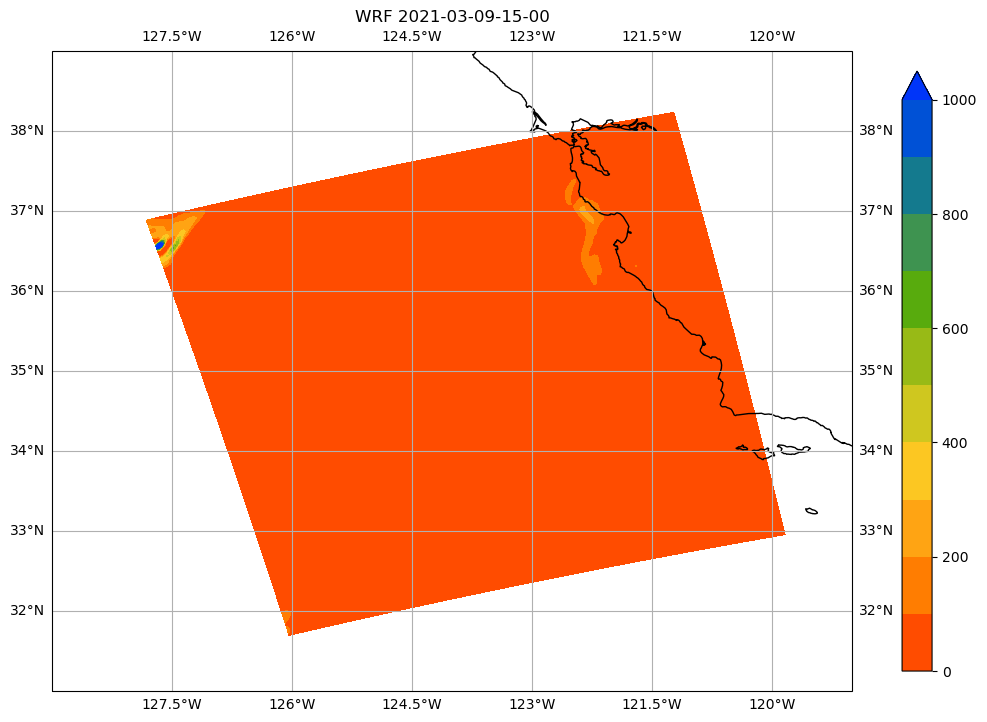

2021-03-09-16-00
2021-03-09T16:00:00.000000000
0.0 2394.9226


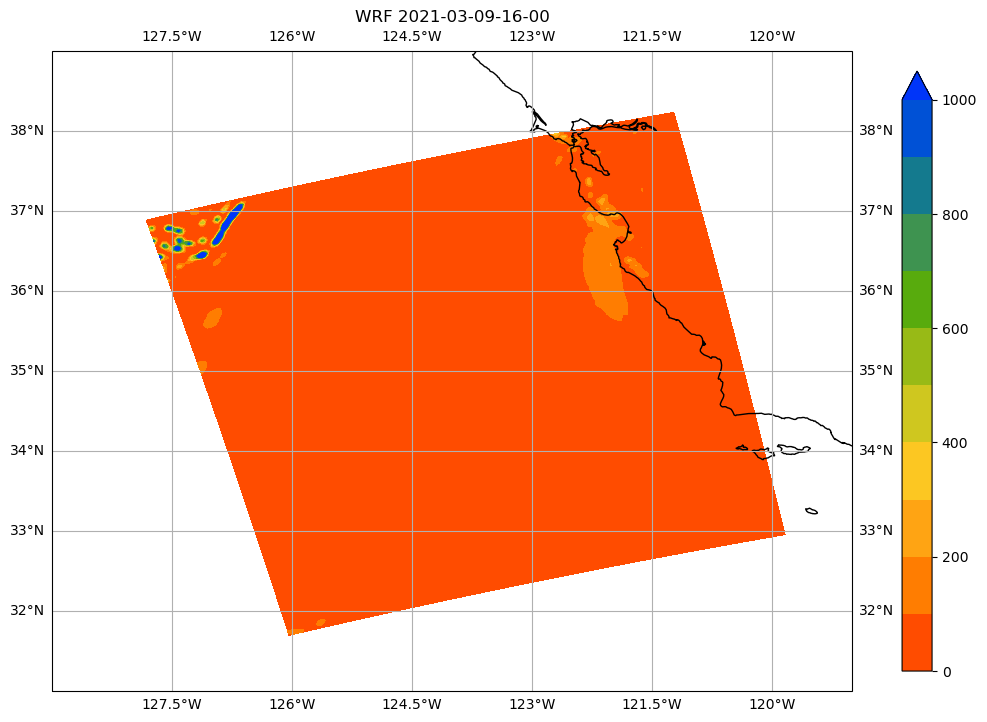

2021-03-09-17-00
2021-03-09T17:00:00.000000000
0.0 3314.045


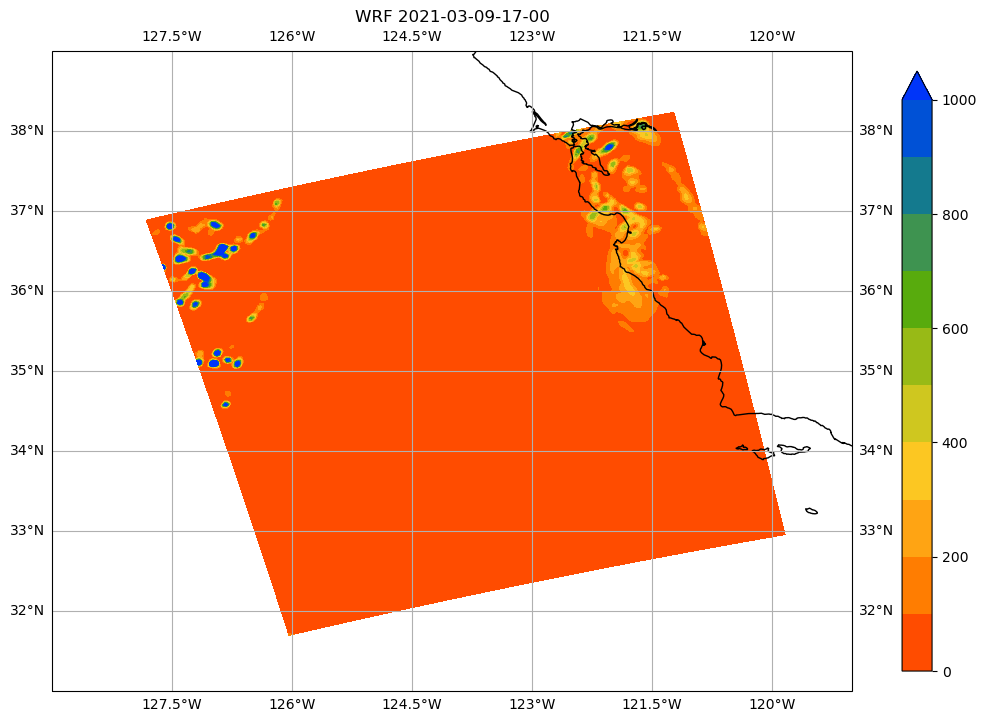

2021-03-09-18-00
2021-03-09T18:00:00.000000000
0.0 3806.1104


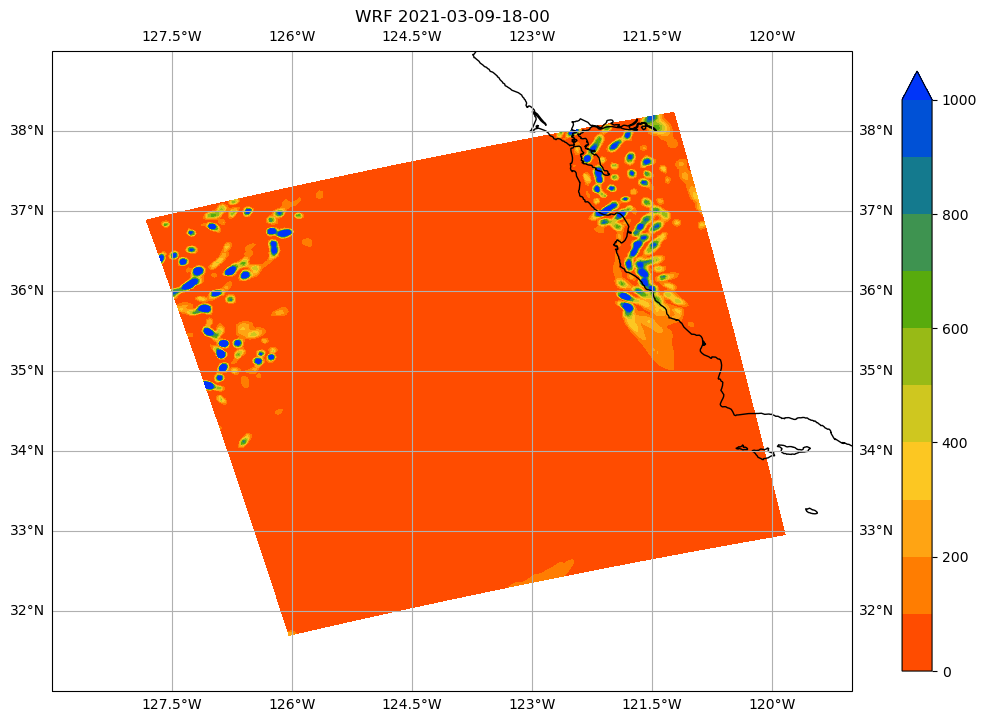

2021-03-09-19-00
2021-03-09T19:00:00.000000000
0.0 3579.7507


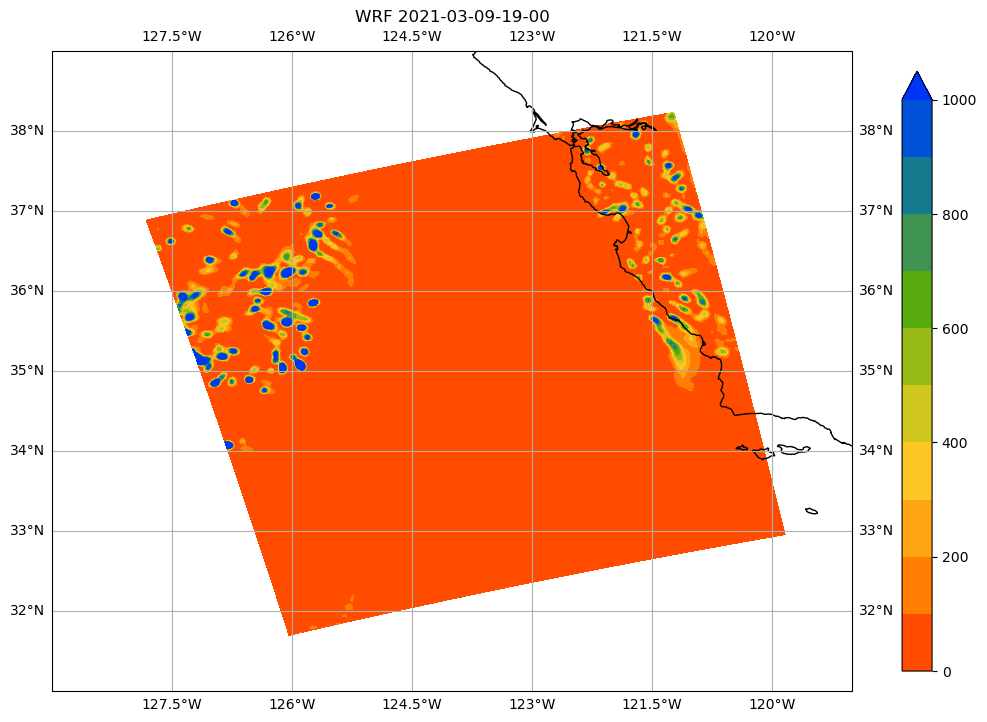

2021-03-09-20-00
2021-03-09T20:00:00.000000000
0.0 3622.9543


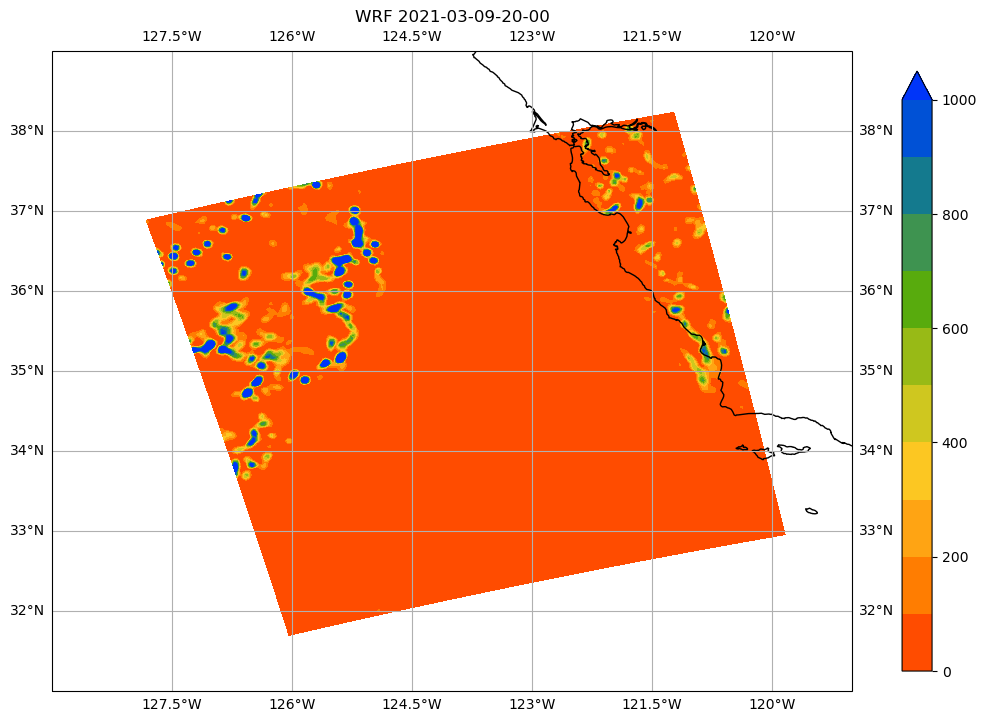

2021-03-09-21-00
2021-03-09T21:00:00.000000000
0.0 5255.971


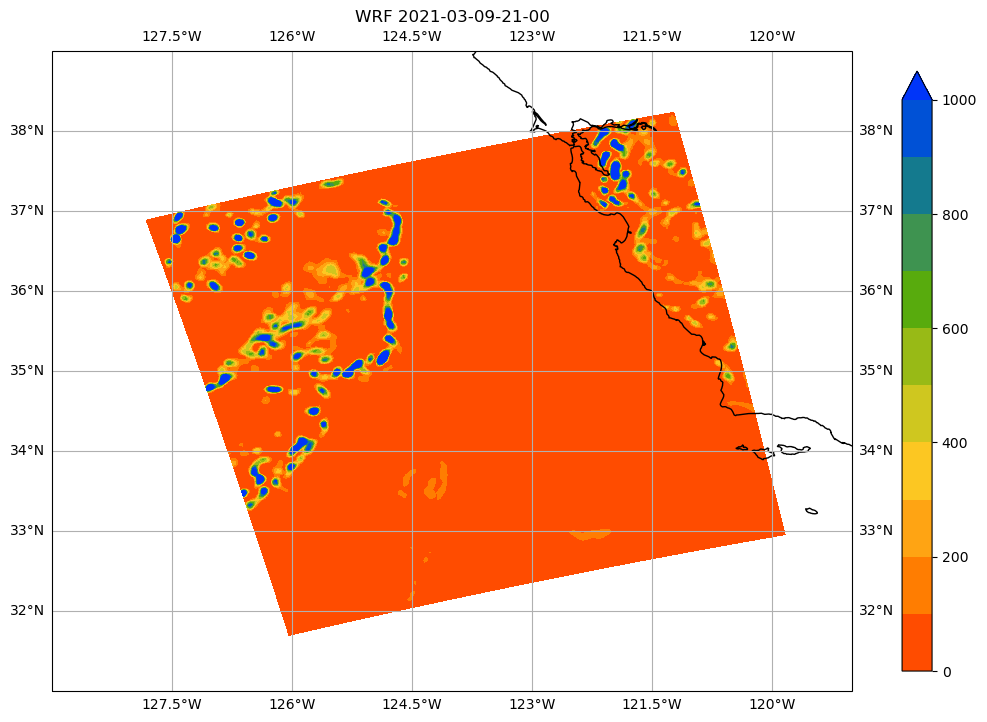

2021-03-09-22-00
2021-03-09T22:00:00.000000000
0.0 3242.6443


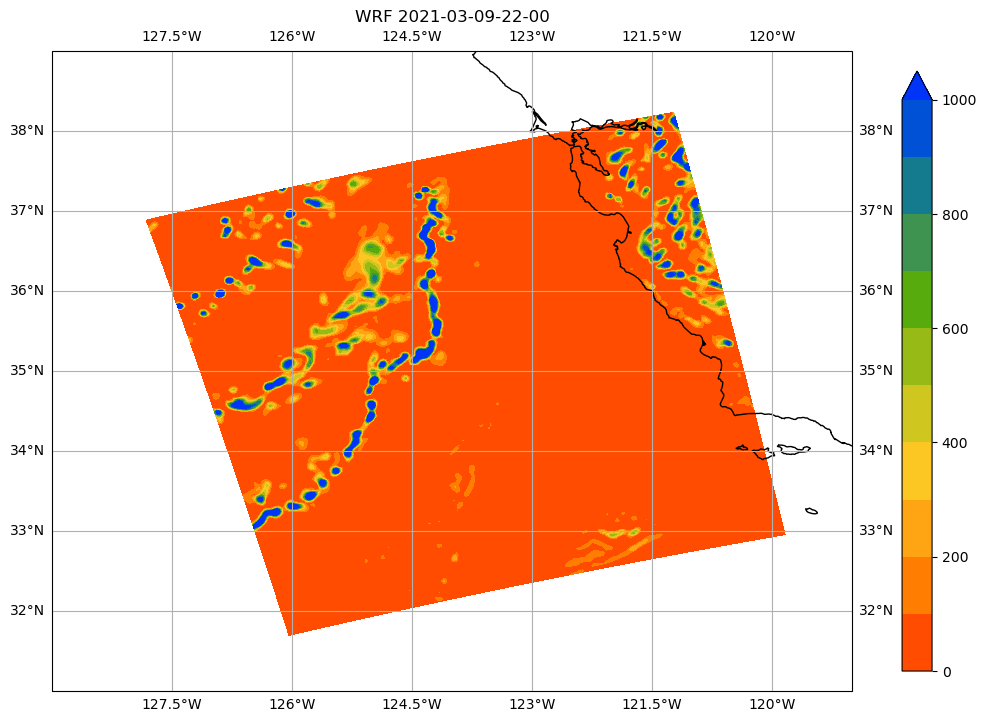

2021-03-09-23-00
2021-03-09T23:00:00.000000000
0.0 4155.417


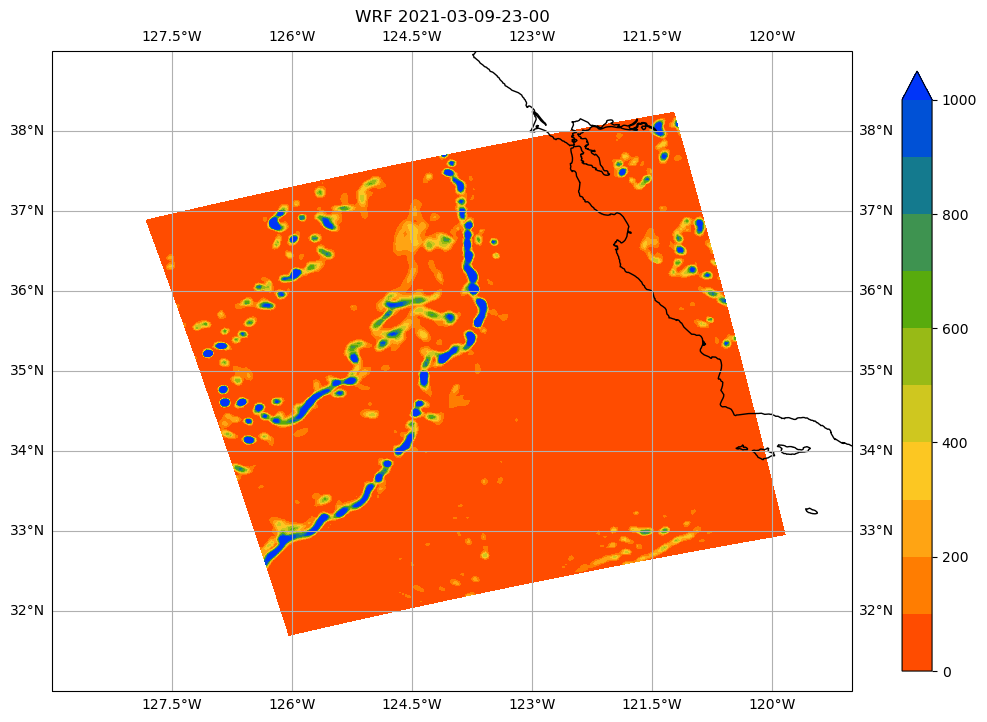

2021-03-10-00-00
2021-03-10T00:00:00.000000000
0.0 2902.0974


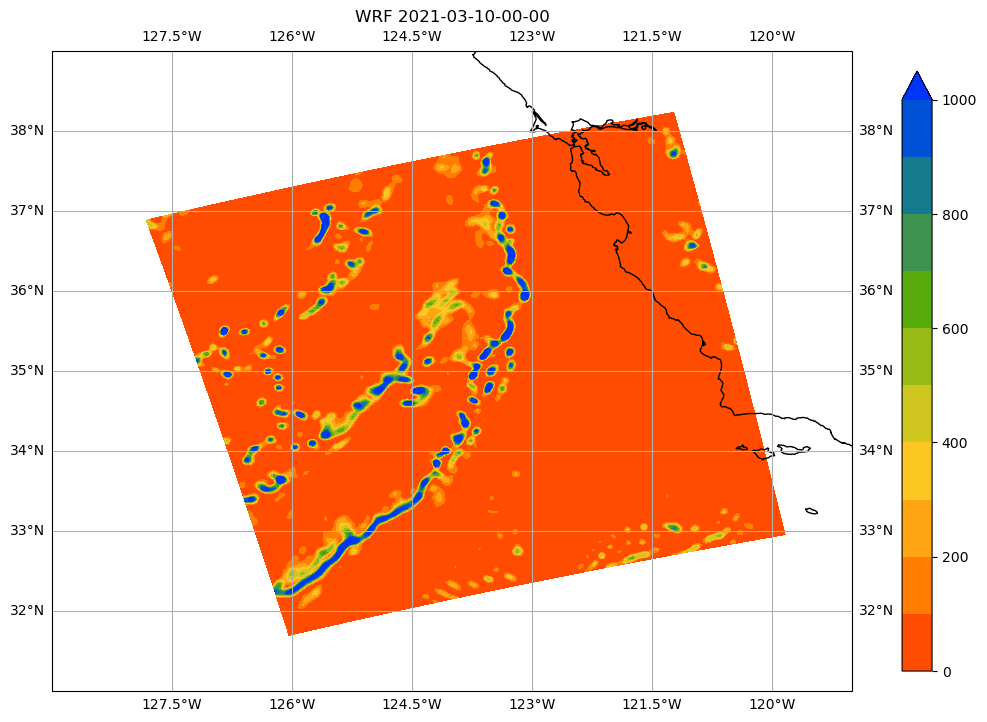

2021-03-10-01-00
2021-03-10T01:00:00.000000000
0.0 4562.0864


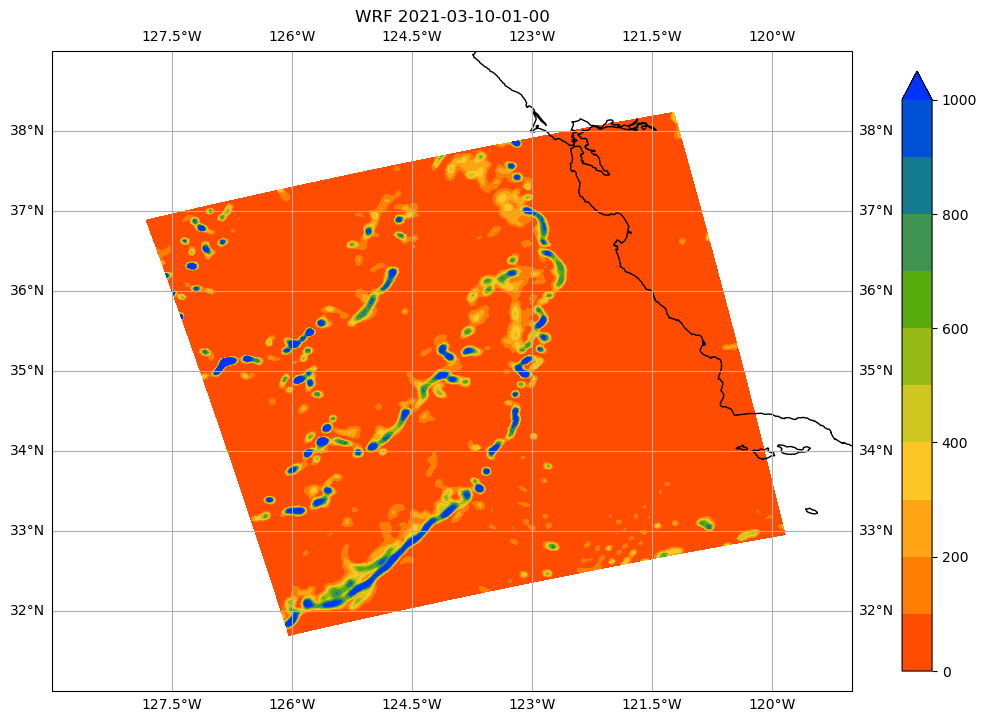

2021-03-10-02-00
2021-03-10T02:00:00.000000000
0.0 4698.1064


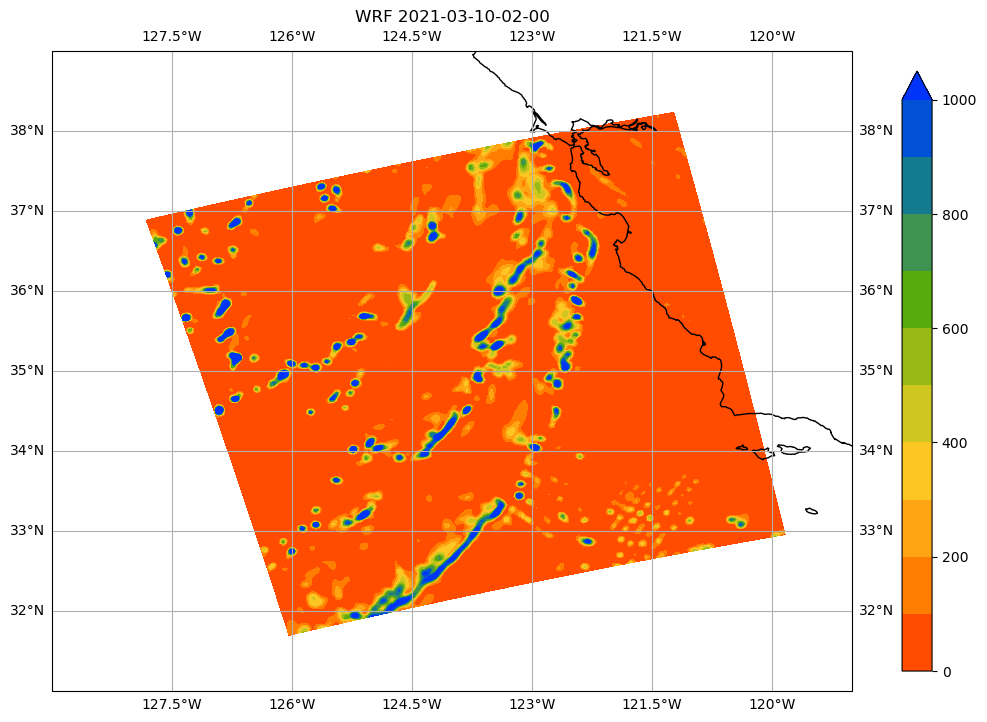

2021-03-10-03-00
2021-03-10T03:00:00.000000000
0.0 4055.625


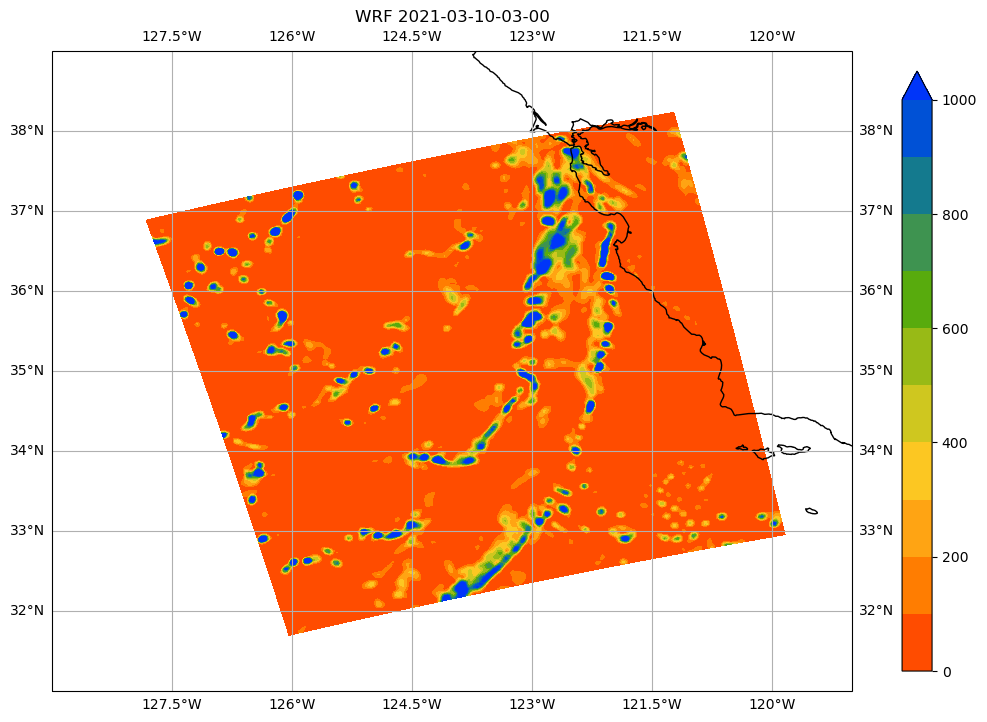

2021-03-10-04-00
2021-03-10T04:00:00.000000000
0.0 3579.9028


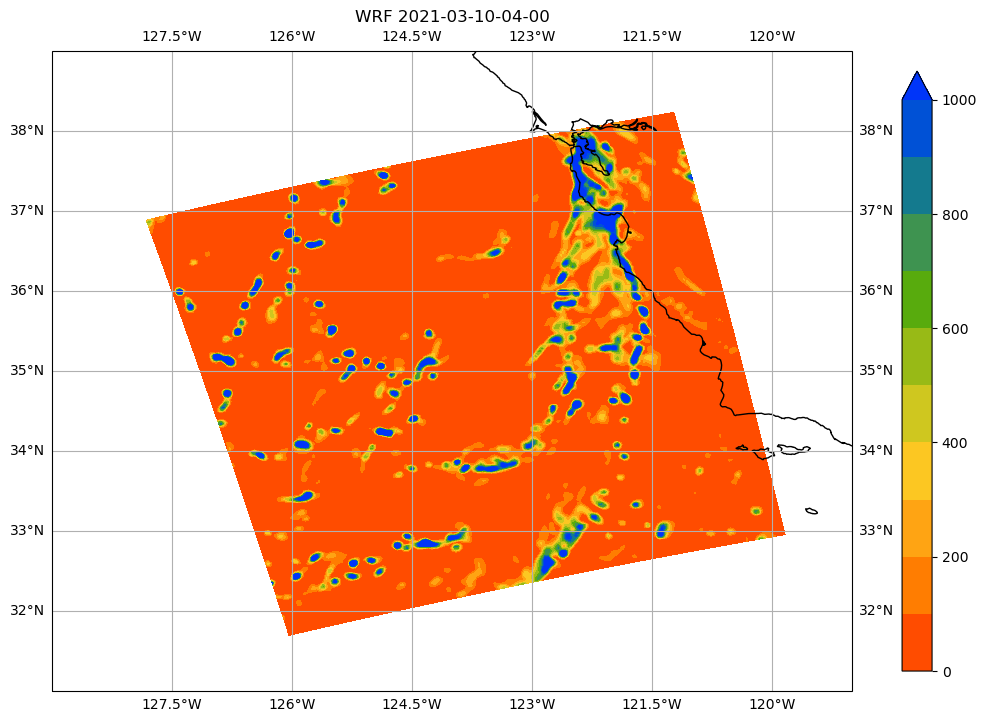

2021-03-10-05-00
2021-03-10T05:00:00.000000000
0.0 3635.9707


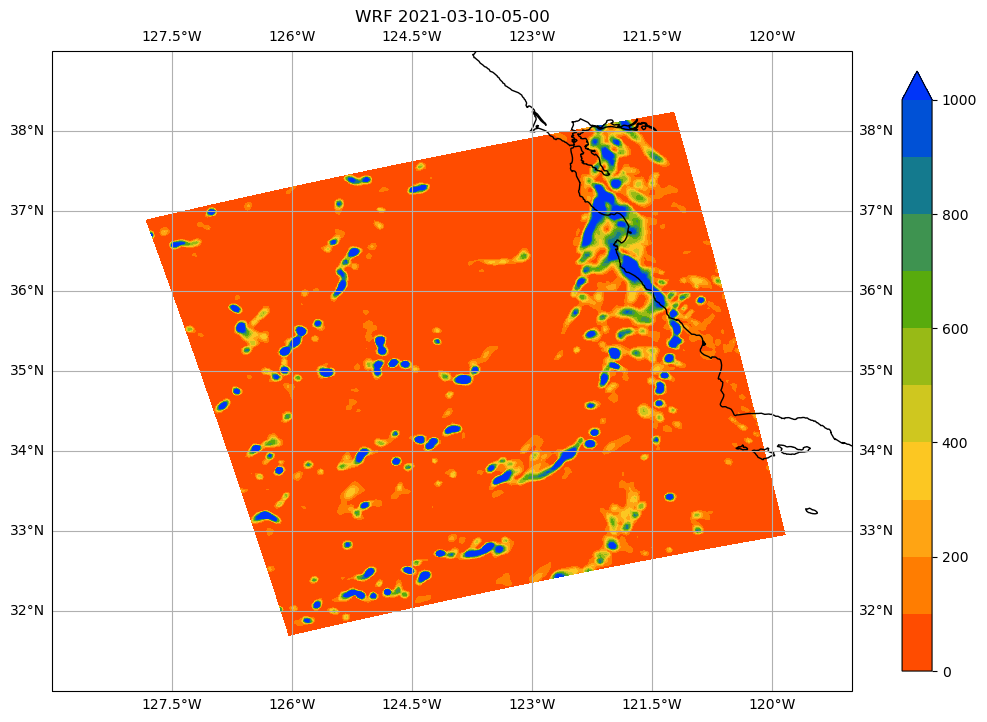

2021-03-10-06-00
2021-03-10T06:00:00.000000000
0.0 2941.2166


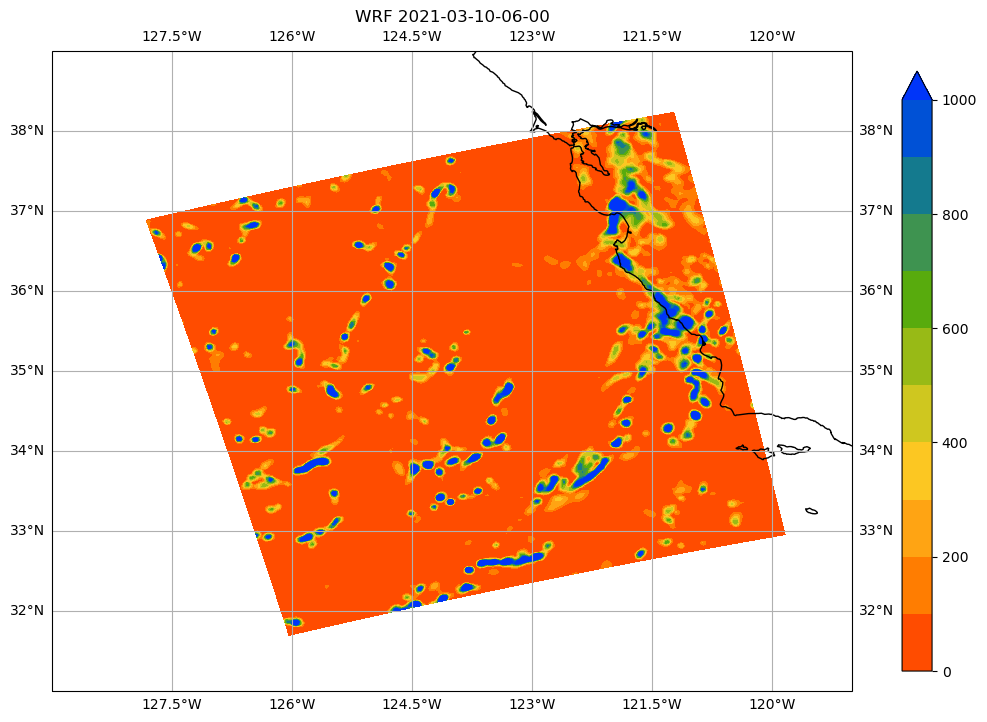

2021-03-10-07-00
2021-03-10T07:00:00.000000000
0.0 3582.0718


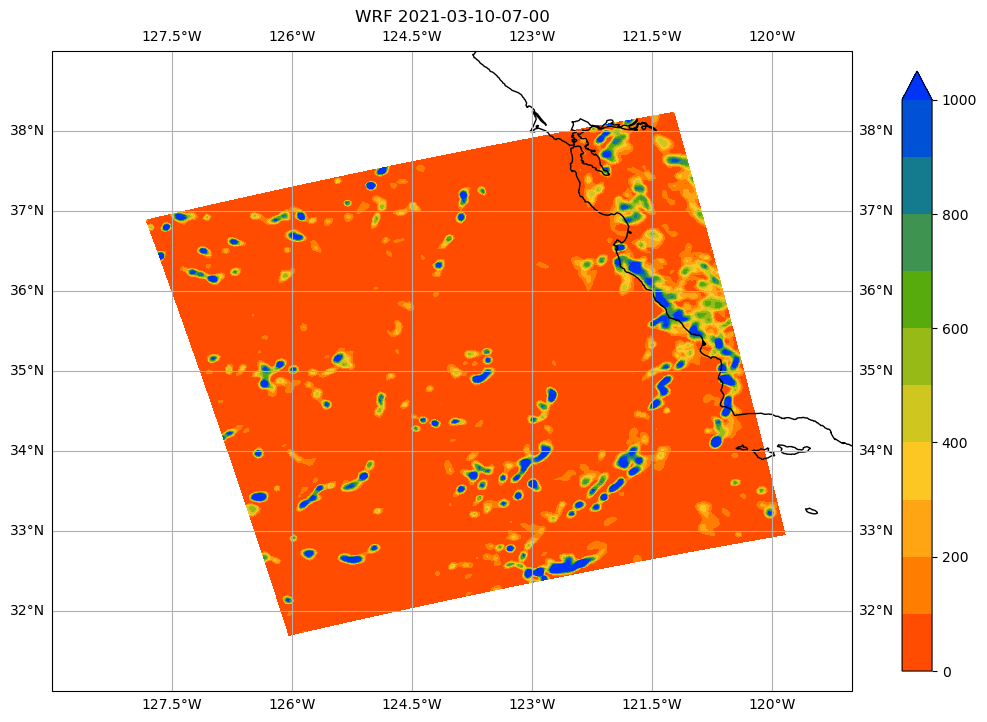

2021-03-10-08-00
2021-03-10T08:00:00.000000000
0.0 3906.336


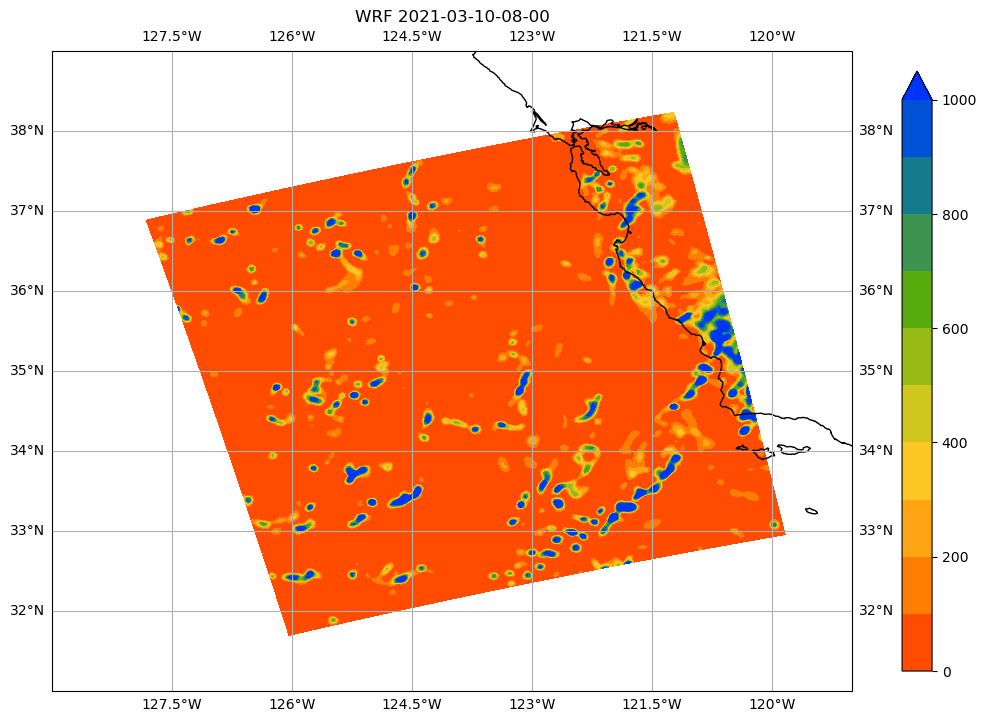

2021-03-10-09-00
2021-03-10T09:00:00.000000000
0.0 3496.0215


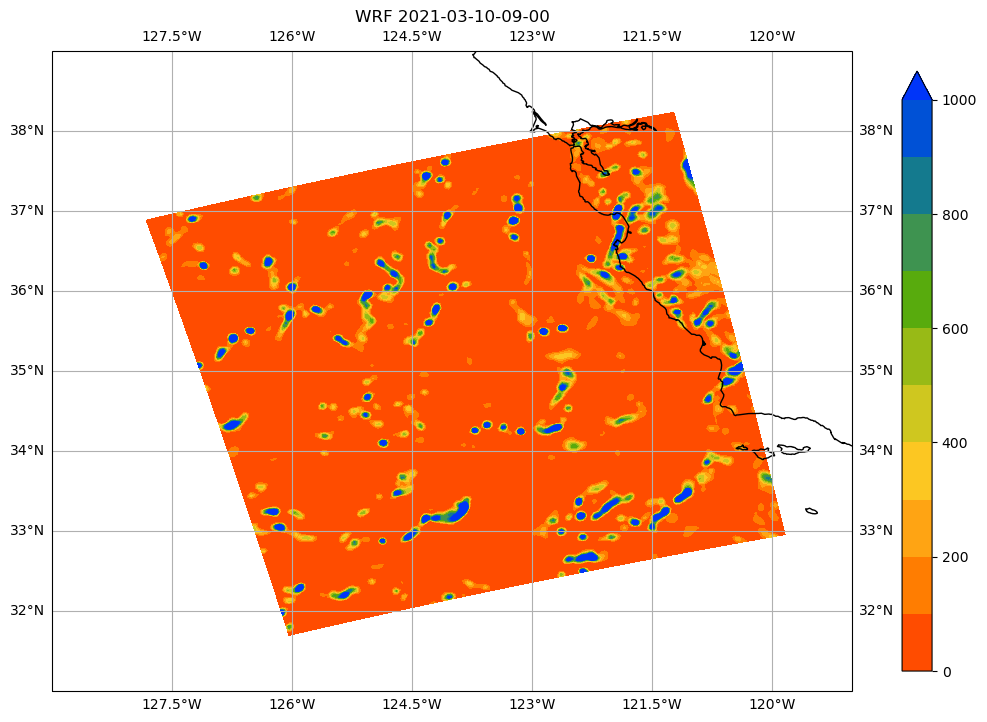

2021-03-10-10-00
2021-03-10T10:00:00.000000000
0.0 4499.07


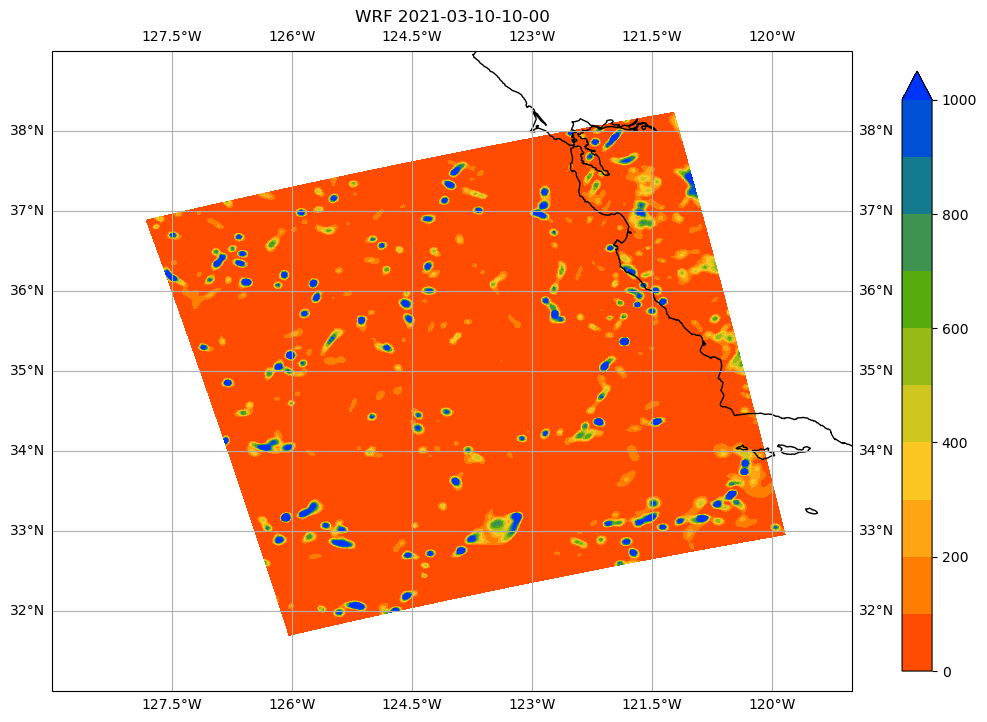

2021-03-10-11-00
2021-03-10T11:00:00.000000000
0.0 3421.782


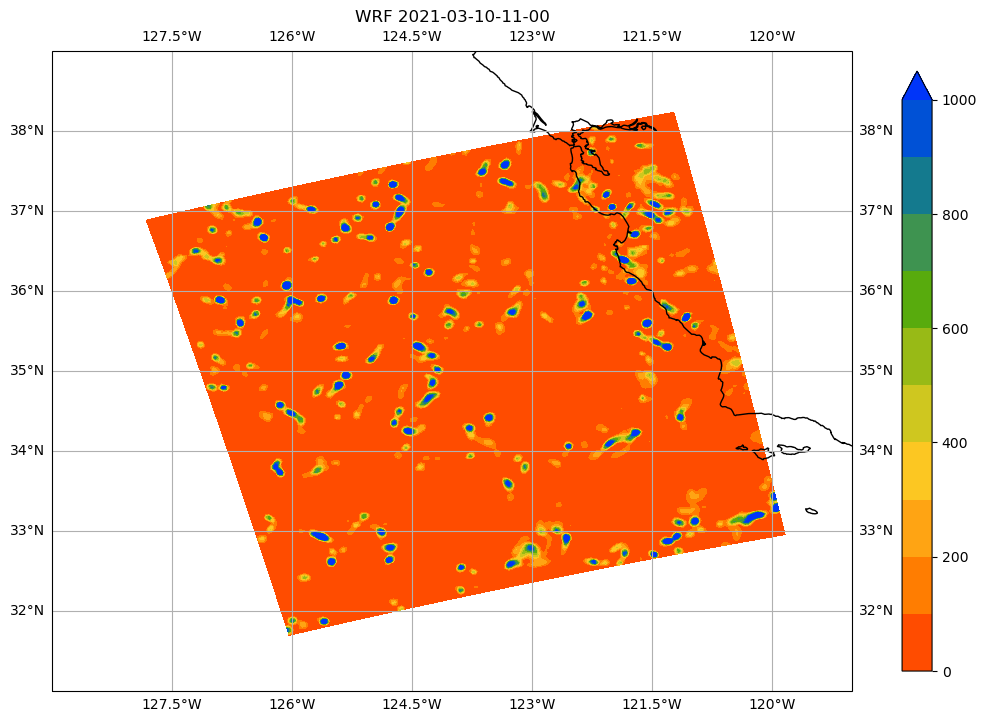

2021-03-10-12-00
2021-03-10T12:00:00.000000000
0.0 5240.256


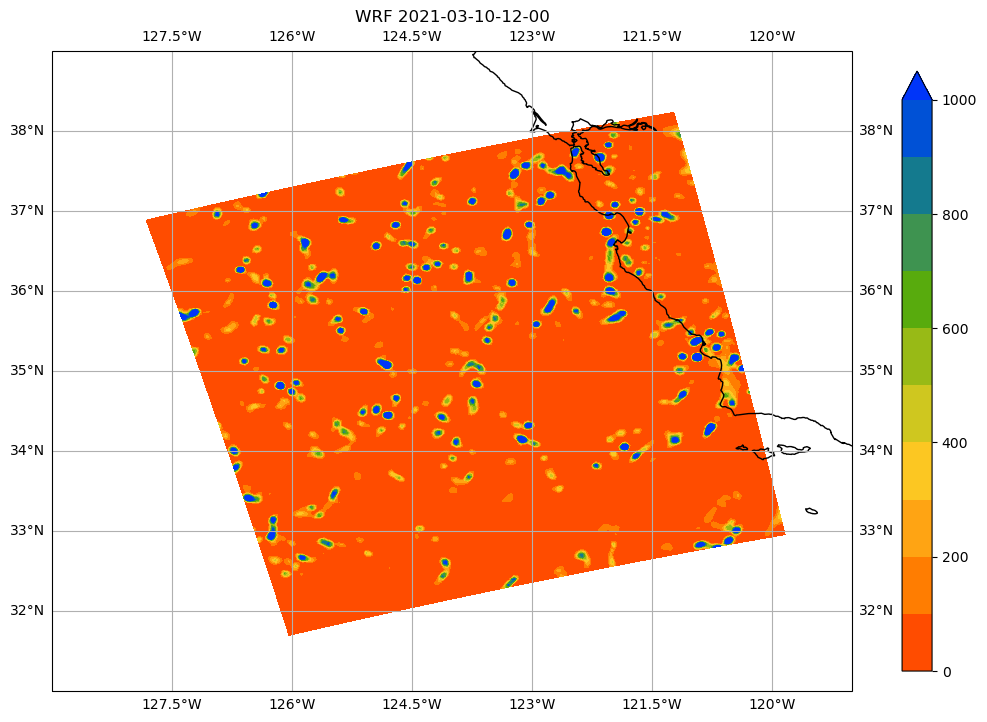

2021-03-10-13-00
2021-03-10T13:00:00.000000000
0.0 4965.472


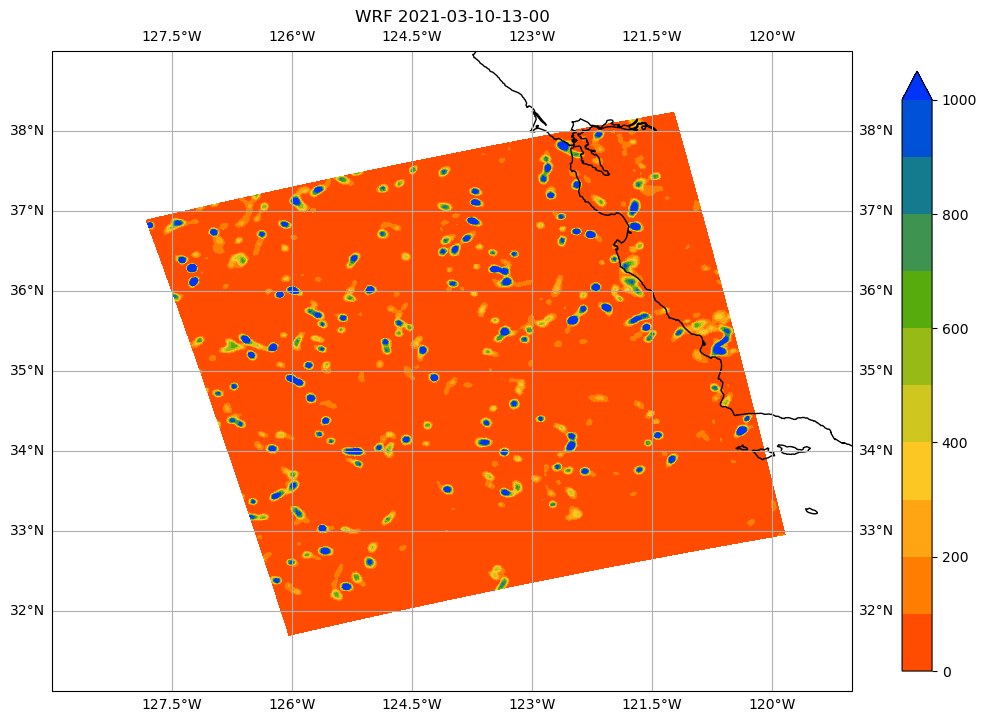

2021-03-10-14-00
2021-03-10T14:00:00.000000000
0.0 3811.2588


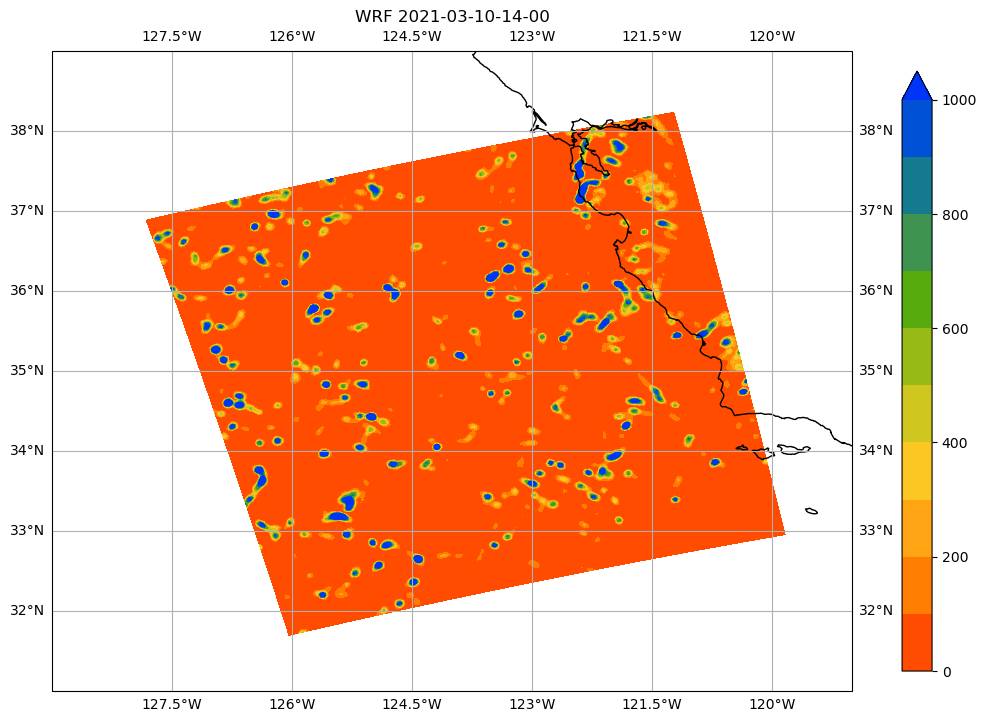

2021-03-10-15-00
2021-03-10T15:00:00.000000000
0.0 3760.5024


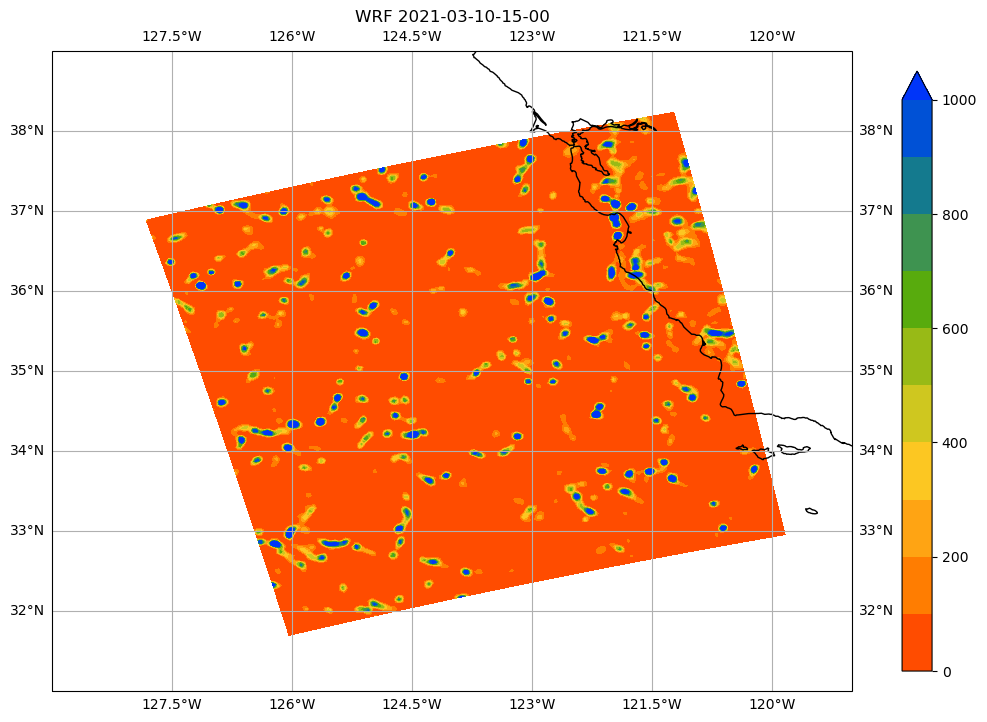

2021-03-10-16-00
2021-03-10T16:00:00.000000000
0.0 3944.033


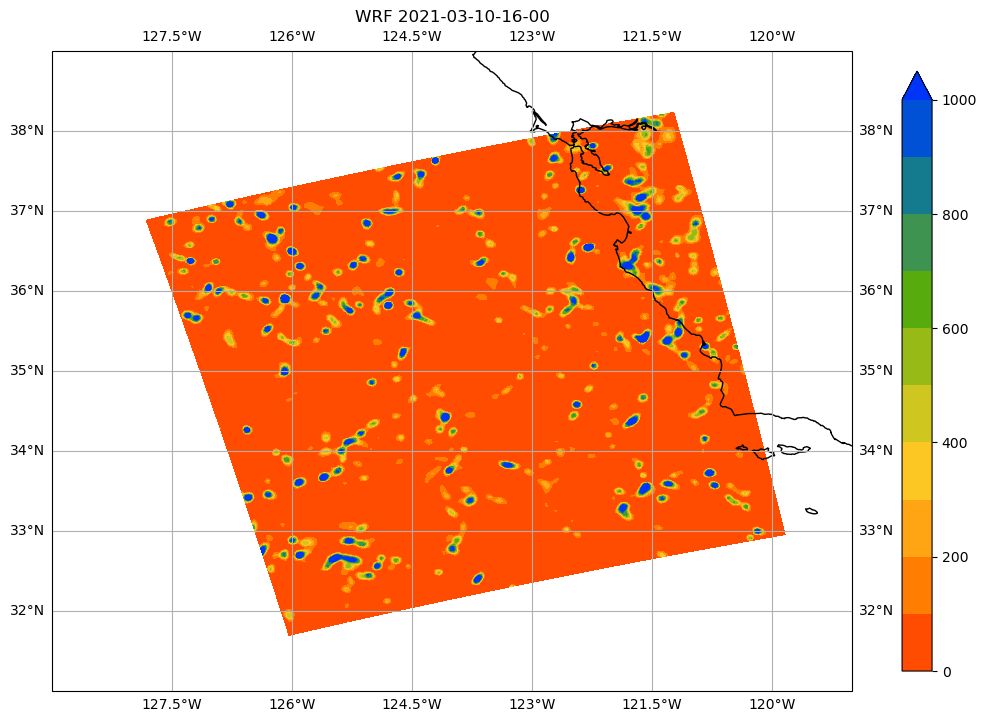

2021-03-10-17-00
2021-03-10T17:00:00.000000000
0.0 2998.5728


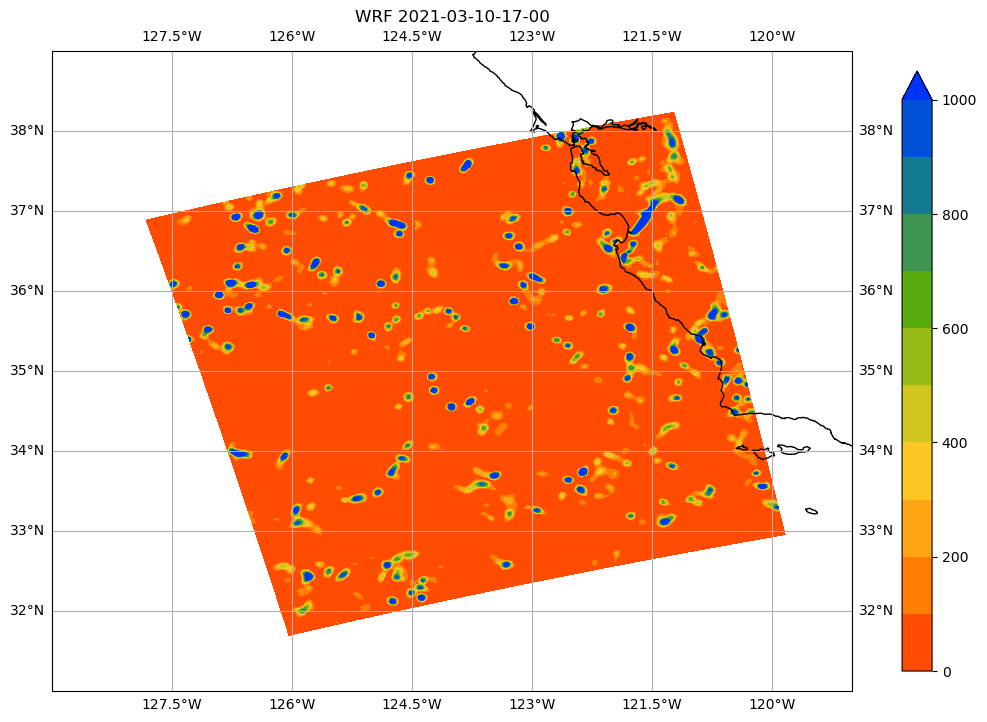

2021-03-10-18-00
2021-03-10T18:00:00.000000000
0.0 3415.2925


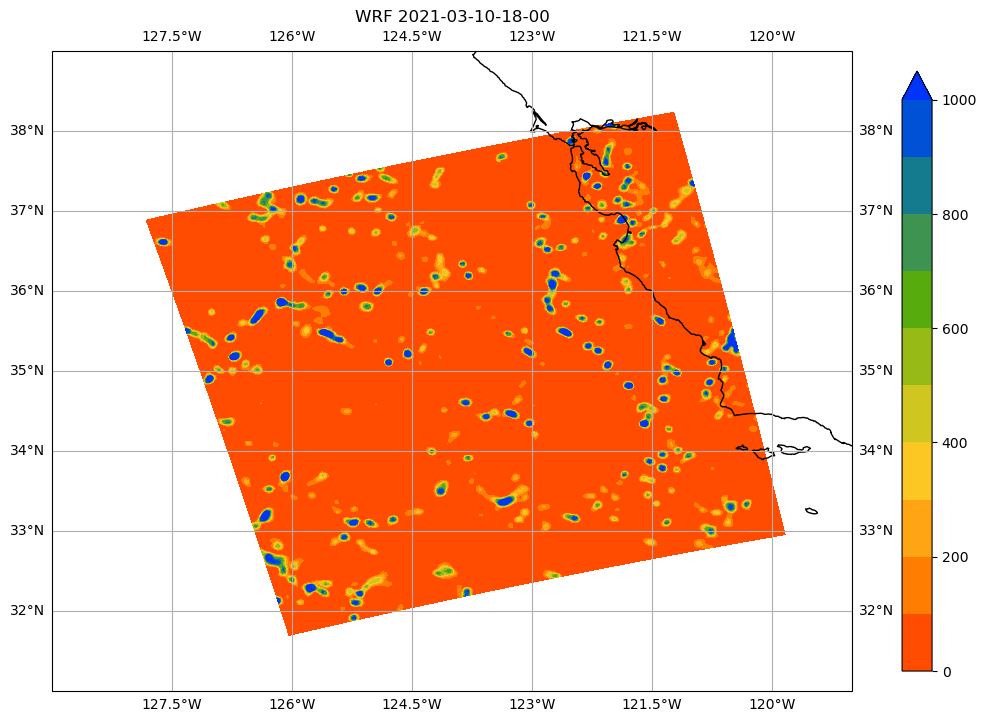

2021-03-10-19-00
2021-03-10T19:00:00.000000000
0.0 3661.9153


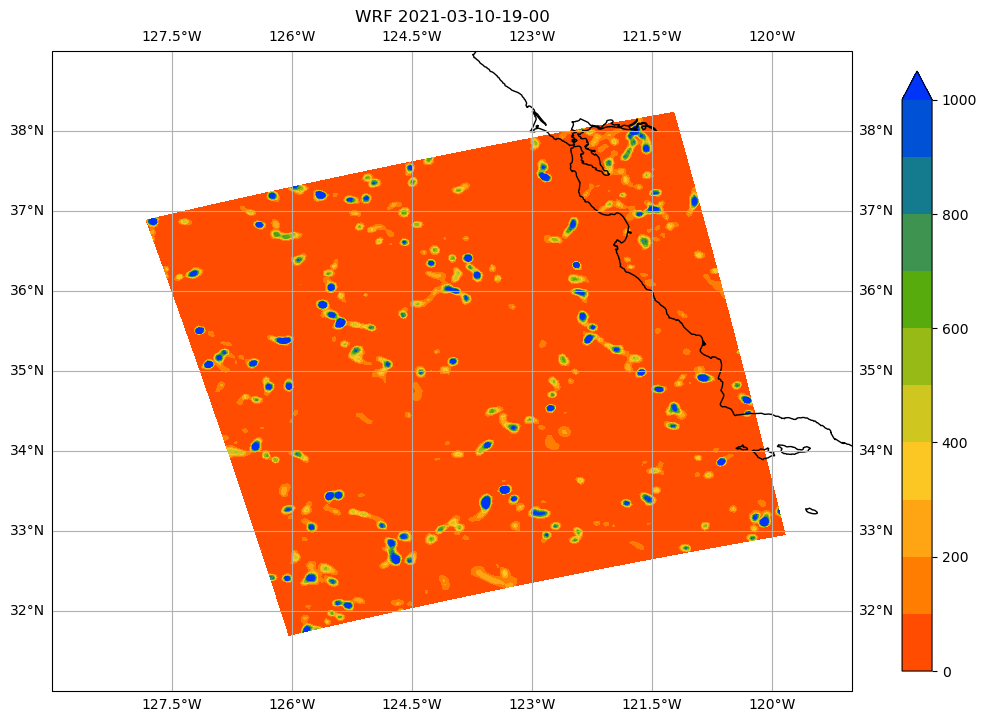

2021-03-10-20-00
2021-03-10T20:00:00.000000000
0.0 3849.2854


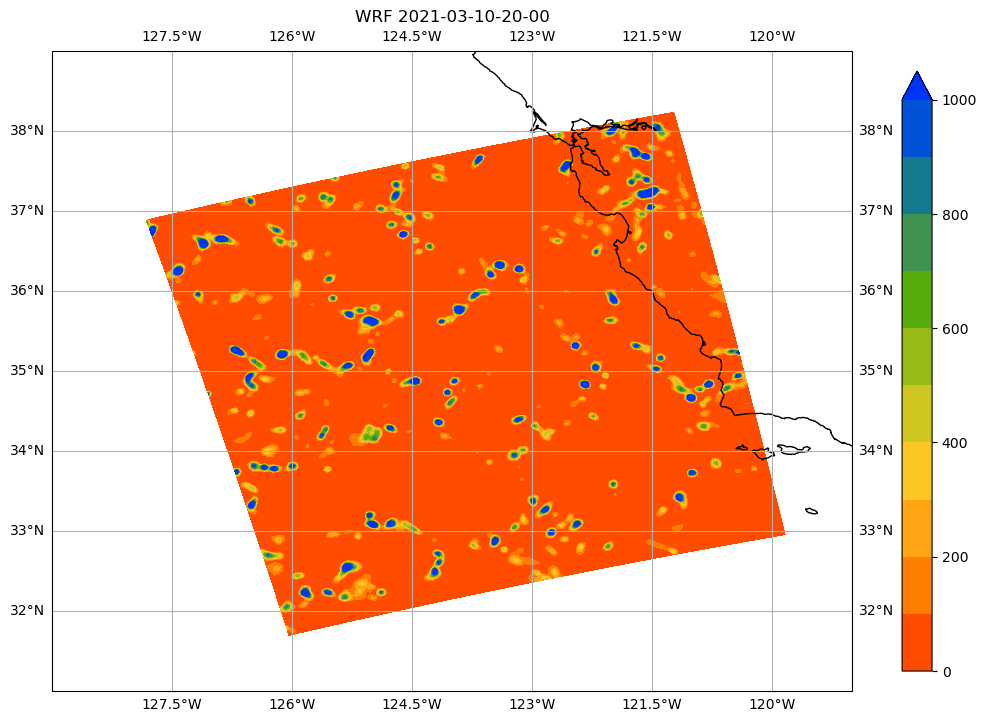

2021-03-10-21-00
2021-03-10T21:00:00.000000000
0.0 3809.0005


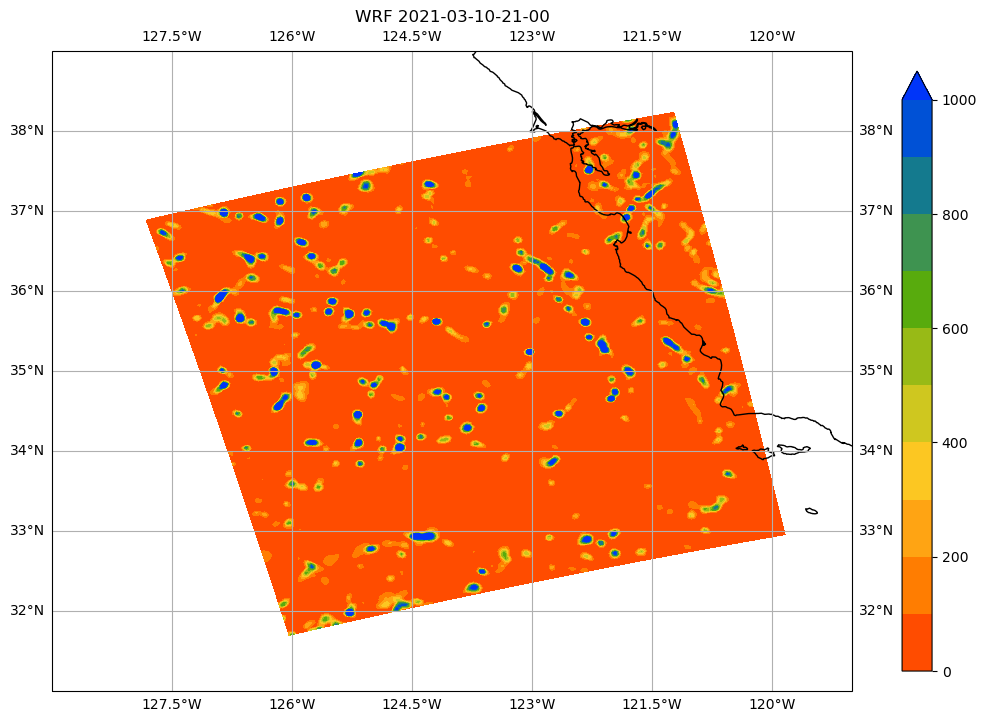

2021-03-10-22-00
2021-03-10T22:00:00.000000000
0.0 5114.1055


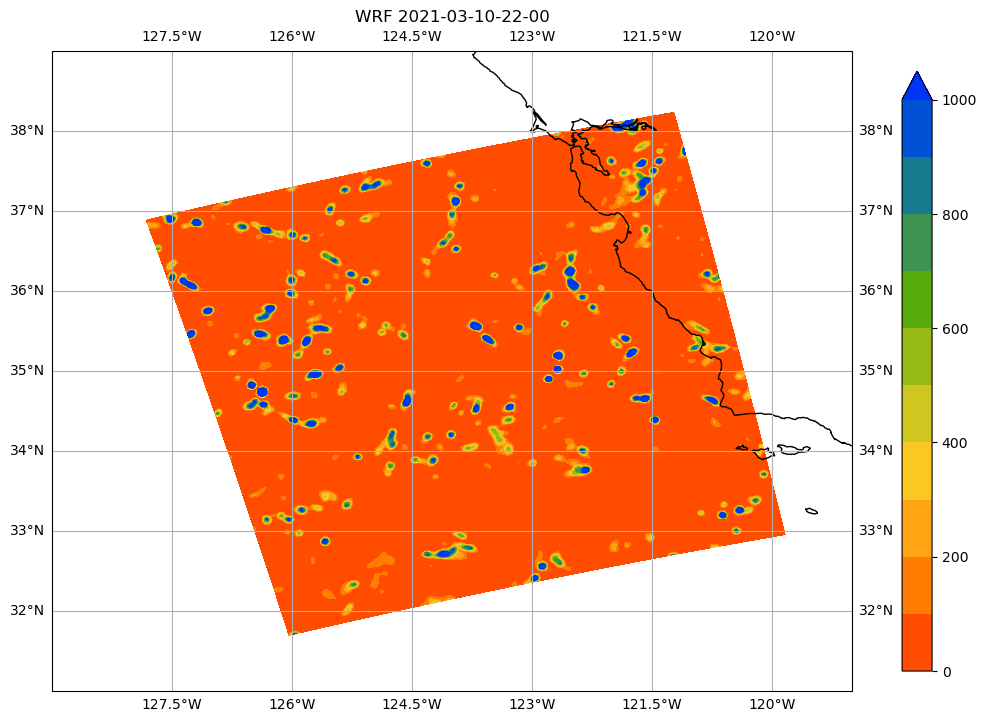

2021-03-10-23-00
2021-03-10T23:00:00.000000000
0.0 4040.4663


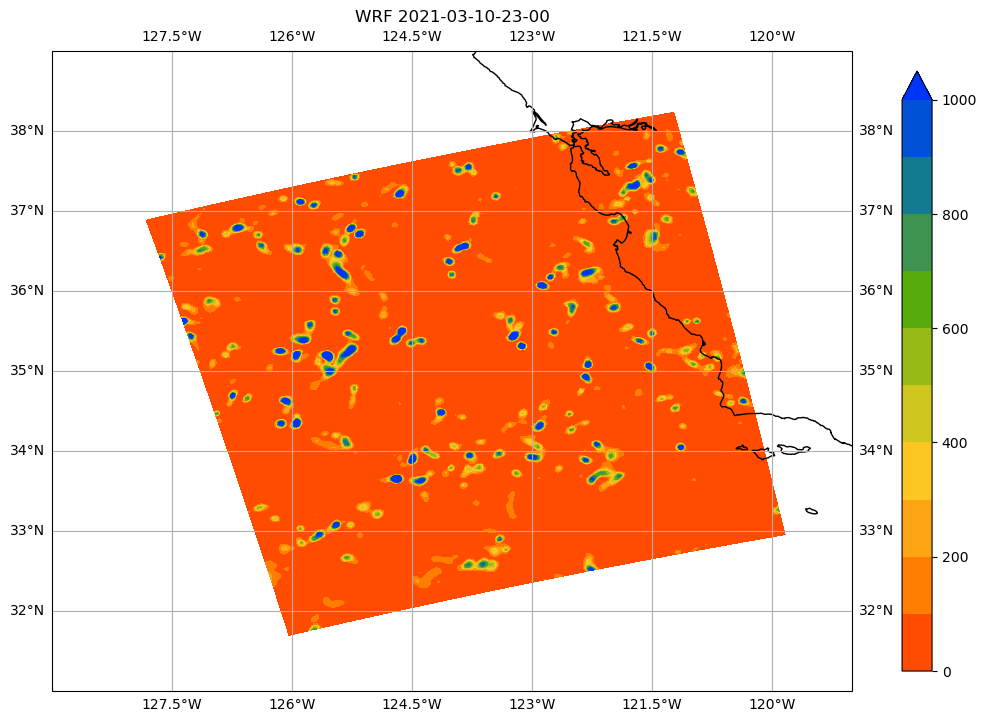

2021-03-11-00-00
2021-03-11T00:00:00.000000000
0.0 3735.0688


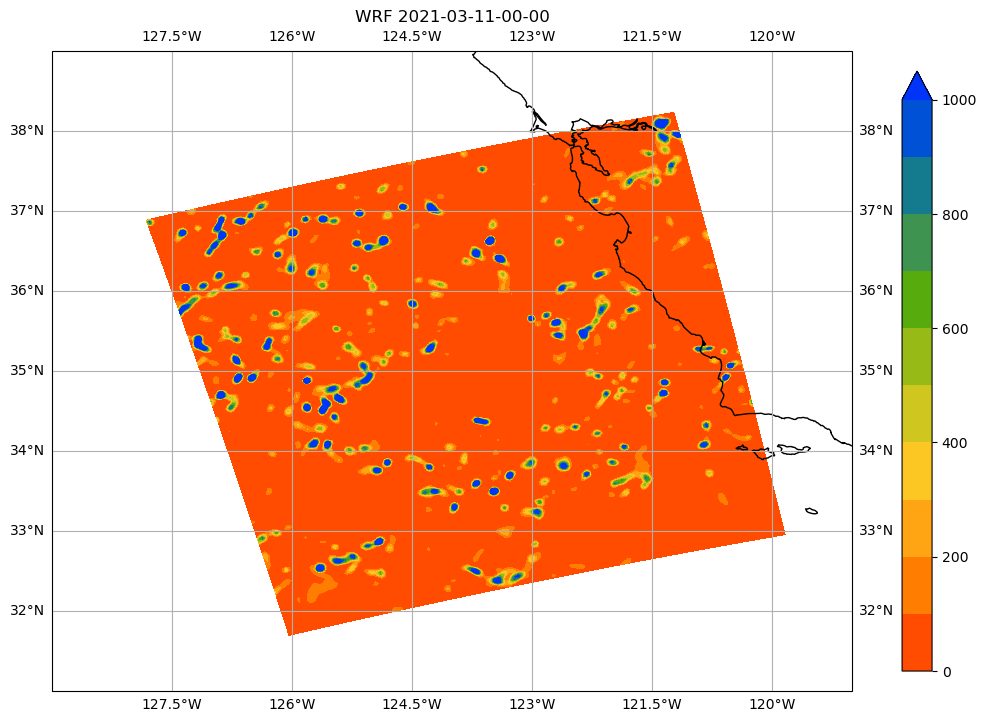

In [23]:
plot_map(wrf, 'WRF', 'time', DATES)